# Introduccion: Polucion y calidad del Aire en Seúl, Corea del Sur.

# 1. Importacion de librerias y funciones a usar.

Antes de poder comenzar, nos aseguramos que dentro de nuestro entorno virtual $(venv)$, tenemos las librerias necesarias para poder desarrollar el proyecto. Desde plotly y seaborn para visualizar, hasta sklearn y statsmodels para tener resumenes estadisticos y aplicaciones de modelos para la problematica planteada, este debe ser el primer paso a seguir.

In [105]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns
import scipy as sp
import folium
import json
import matplotlib.cm as cm
import mglearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from scipy.stats import pointbiserialr, kstest, norm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, normaltest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline

# 2. Analisis de los DataFrames dentro del dataSet escogido.

Al cargar el dataSet, este contiene cuatro (4) archivos de formato .csv, a continuacion, se van a importar y observar las cualidades, caracteristicas y relevancia de estos archivos para el proyecto.

In [3]:
df1 = pd.read_csv("C:\\Users\\taran\\Downloads\\aire_seul\\Measurement_info.csv", sep=',')

df2 = pd.read_csv("C:\\Users\\taran\\Downloads\\aire_seul\\Measurement_item_info.csv", sep=',')

df3 = pd.read_csv("C:\\Users\\taran\\Downloads\\aire_seul\\Measurement_station_info.csv", sep=',')

df4 = pd.read_csv("C:\\Users\\taran\\Downloads\\aire_seul\\Measurement_summary.csv", sep=',')

In [4]:
def analizar_dataframe(df, nombre="DataFrame"):
    from IPython.display import display
    
    print(f"\n Análisis exploratorio de: {nombre}")
    print("=" * 75)
    
    print(f"Filas: {df.shape[0]:,}  |  Columnas: {df.shape[1]}")
    print("=" * 75)
    
    print(df.dtypes)
    print("=" * 75)
    
    print(df.isnull().sum())
    print("=" * 75)

    display(df.head())
    

Aqui, la funcion creada realiza un simple analisis sobre la estructura de los datos, para poder tener un entendimiento eficaz y consiso de las variables y sus observaciones.

## 2.1 DataFrame #1 (Measurement_info.csv)

In [5]:
analizar_dataframe(df1, nombre="Measurement_info.csv")
print(df1)


 Análisis exploratorio de: Measurement_info.csv
Filas: 3,885,066  |  Columnas: 5
Measurement date      object
Station code           int64
Item code              int64
Average value        float64
Instrument status      int64
dtype: object
Measurement date     0
Station code         0
Item code            0
Average value        0
Instrument status    0
dtype: int64


Measurement date  Station code  Item code  Average value  Instrument status
0  2017-01-01 00:00           101          1          0.004                  0
1  2017-01-01 00:00           101          3          0.059                  0
2  2017-01-01 00:00           101          5          1.200                  0
3  2017-01-01 00:00           101          6          0.002                  0
4  2017-01-01 00:00           101          8         73.000                  0

         Measurement date  Station code  Item code  Average value  \
0        2017-01-01 00:00           101          1          0.004   
1        2017-01-01 00:00           101          3          0.059   
2        2017-01-01 00:00           101          5          1.200   
3        2017-01-01 00:00           101          6          0.002   
4        2017-01-01 00:00           101          8         73.000   
...                   ...           ...        ...            ...   
3885061  2019-12-31 23:00           123          9         13.000   
3885062  2019-12-31 23:00           118          9         24.000   
3885063  2019-12-31 23:00           105          8         19.000   
3885064  2019-12-31 23:00           125          3          0.037   
3885065  2019-12-31 23:00           108          3          0.030   

         Instrument status  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

Para el dataFrame measurement_info.csv, contiene aproximadamente $3,885,066$ filas con $5$ columnas, lo cual nos da un valor de $19,425,330$ datos totales u observaciones. Cabe resaltar que estos hacen referencia a la fecha (dia y hora), ademas de las estaciones y su valor promedio sobre los datos analizados. En su mayoria, son valores numericos y no encontramos valores nulos o NaN.


## 2.2 DataFrame #2 (Measurement_item_info.csv)

In [6]:
analizar_dataframe(df2, nombre="Measurement_item_info.csv")
print(df2)


 Análisis exploratorio de: Measurement_item_info.csv
Filas: 6  |  Columnas: 7
Item code                int64
Item name               object
Unit of measurement     object
Good(Blue)             float64
Normal(Green)          float64
Bad(Yellow)            float64
Very bad(Red)          float64
dtype: object
Item code              0
Item name              0
Unit of measurement    0
Good(Blue)             0
Normal(Green)          0
Bad(Yellow)            0
Very bad(Red)          0
dtype: int64


Item code Item name Unit of measurement  Good(Blue)  Normal(Green)  \
0          1       SO2                 ppm        0.02           0.05   
1          3       NO2                 ppm        0.03           0.06   
2          5        CO                 ppm        2.00           9.00   
3          6        O3                 ppm        0.03           0.09   
4          8      PM10       Mircrogram/m3       30.00          80.00   

   Bad(Yellow)  Very bad(Red)  
0         0.15            1.0  
1         0.20            2.0  
2        15.00           50.0  
3         0.15            0.5  
4       150.00          600.0

   Item code Item name Unit of measurement  Good(Blue)  Normal(Green)  \
0          1       SO2                 ppm        0.02           0.05   
1          3       NO2                 ppm        0.03           0.06   
2          5        CO                 ppm        2.00           9.00   
3          6        O3                 ppm        0.03           0.09   
4          8      PM10       Mircrogram/m3       30.00          80.00   
5          9     PM2.5       Mircrogram/m3       15.00          35.00   

   Bad(Yellow)  Very bad(Red)  
0         0.15            1.0  
1         0.20            2.0  
2        15.00           50.0  
3         0.15            0.5  
4       150.00          600.0  
5        75.00          500.0  


Para el DataFrame Measurement_item_info.csv, describe el nombre de los contaminantes, su unidad de medida, ademas de proporcionar valores que califican la calidad de este mismo.

## 2.3 DataFrame #3 (Measurement_station_info.csv)

In [7]:
analizar_dataframe(df3, nombre="Measurement_station_info.csv")



 Análisis exploratorio de: Measurement_station_info.csv
Filas: 25  |  Columnas: 5
Station code                int64
Station name(district)     object
Address                    object
Latitude                  float64
Longitude                 float64
dtype: object
Station code              0
Station name(district)    0
Address                   0
Latitude                  0
Longitude                 0
dtype: int64


Station code Station name(district)  \
0           101              Jongno-gu   
1           102                Jung-gu   
2           103             Yongsan-gu   
3           104           Eunpyeong-gu   
4           105           Seodaemun-gu   

                                             Address   Latitude   Longitude  
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008  
1  15, Deoksugung-gil, Jung-gu, Seoul, Republic o...  37.564263  126.974676  
2  136, Hannam-daero, Yongsan-gu, Seoul, Republic...  37.540033  127.004850  
3  215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...  37.609823  126.934848  
4  32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...  37.593742  126.949679

El DataFrame Measuramente_station_info.csv muestra de forma directa informacion geografica con relacion a las estaciones donde se tomaron los datos, desde el nombre (distrito) de la estacion, ademas de su direccion y las coordenadas en forma de latitud y longitud.

## 2.4 DataFrame #4 (Measurement_summary.csv)

In [8]:
analizar_dataframe(df4, nombre="Measurement_summary.csv")



 Análisis exploratorio de: Measurement_summary.csv
Filas: 647,511  |  Columnas: 11
Measurement date     object
Station code          int64
Address              object
Latitude            float64
Longitude           float64
SO2                 float64
NO2                 float64
O3                  float64
CO                  float64
PM10                float64
PM2.5               float64
dtype: object
Measurement date    0
Station code        0
Address             0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64


Measurement date  Station code  \
0  2017-01-01 00:00           101   
1  2017-01-01 01:00           101   
2  2017-01-01 02:00           101   
3  2017-01-01 03:00           101   
4  2017-01-01 04:00           101   

                                             Address   Latitude   Longitude  \
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
1  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
2  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
3  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
4  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   

     SO2    NO2     O3   CO  PM10  PM2.5  
0  0.004  0.059  0.002  1.2  73.0   57.0  
1  0.004  0.058  0.002  1.2  71.0   59.0  
2  0.004  0.056  0.002  1.2  70.0   59.0  
3  0.004  0.056  0.002  1.2  70.0   58.0  
4  0.003  0.051  0.002  1.2  69.0   61.0

## 2.5 Eleccion y modificacion de dataFrame elegido

En el caso del DataFrame Measurament_summary.csv, como su nombre indica, es un resumen de los tres (3) dataFrames anteriores, juntando tanto el tiempo y fecha de las observaciones, con direcciones, posicion geografica y valores promedios de los indicadores quimicos. Con esto a considerar, se va a tomar el dataFrame #4 (Measurement_summary.csv) como el dataFrame a trabajar para analizar tanto a capacidad de clasificacion como resumenes estadisticos y visuales.

Sin embargo, antes de comenzar, se tomaran medidas adicionales para asegurarnos de tener un entendimiento mas completo sobre el problema en mano:

Primero, se añadiran las etiquetas que indican el nivel de calidad de aire para cada indicador, encontrado en el dataFrame Measurement_item_info.csv. Y acto seguido, se tendra en cuenta que algunos dispositivos pueden estar en arreglos mientras toman las medidas, como lo indica la variable _Instrument status_ en el dataFrame Measurement_info.csv. Ademas, se colocara las variables de tiempo de forma independiente (dia, hora)

In [9]:
unidades_dict = {
    "CO2": "ppm",
    "SO2": "ppm",
    "NO2": "ppm",
    "O3": "ppm",
    "CO": "ppm",
    "PM10": "ug/m3",
    "PM2.5": "ug/m3"
}

def renombrar_variables_con_unidad(df, unidades_dict):
    nuevo_nombre = {}
    for col in df.columns:
        if col in unidades_dict:
            nuevo_nombre[col] = f"{col}_{unidades_dict[col]}"
    return df.rename(columns=nuevo_nombre)

df_final = renombrar_variables_con_unidad(df4, unidades_dict)
df_final.head()


Measurement date  Station code  \
0  2017-01-01 00:00           101   
1  2017-01-01 01:00           101   
2  2017-01-01 02:00           101   
3  2017-01-01 03:00           101   
4  2017-01-01 04:00           101   

                                             Address   Latitude   Longitude  \
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
1  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
2  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
3  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
4  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   

   SO2_ppm  NO2_ppm  O3_ppm  CO_ppm  PM10_ug/m3  PM2.5_ug/m3  
0    0.004    0.059   0.002     1.2        73.0         57.0  
1    0.004    0.058   0.002     1.2        71.0         59.0  
2    0.004    0.056   0.002     1.2        70.0         59.0  
3    0.004    0.056   0.002     1.2        70.0         58.0  
4    0.003    0.051   0.002     1.2        69.0         61.0

Junto a esto, vamos a renombrar las variables para incluir su unidad de medida correspondiente.

In [10]:
df_final['Measurement date'] = pd.to_datetime(df_final['Measurement date'])

df_final['mes'] = df_final['Measurement date'].dt.month
df_final['fecha'] = df_final['Measurement date'].dt.date
df_final['hora'] = df_final['Measurement date'].dt.time
df_final['dia'] = df_final['Measurement date'].dt.day
df_final['dia_semana'] = df_final['Measurement date'].dt.day_name()


Tambien colocamos el estado del dispositivo usado para los registros.

In [11]:
df_final['estado_equipo'] = df1['Instrument status']
estado_dict = {
    0: "normal",
    1: "calibracion",
    2: "anormal",
    4: "corte_energia",
    8: "reparacion",
    9: "dato_erroneo"
}
df_final['estado_equipo'] = df_final['estado_equipo'].map(estado_dict)

Colocamos el nombre de la estacion perteneciente al codigo de cada estacion. Tambien haremos algunos cambios a los nombre de variables antes de proceder.

In [12]:
codigos_estacion = {
    101: "Jongno-gu", 102: "Jung-gu", 103: "Yongsan-gu", 104: "Eunpyeong-gu", 105: "Seodaemun-gu",
    106: "Mapo-gu", 107: "Seongdong-gu", 108: "Gwangjin-gu", 109: "Dongdaemun-gu", 110: "Jungnang-gu",
    111: "Seongbuk-gu", 112: "Gangbuk-gu", 113: "Dobong-gu", 114: "Nowon-gu", 115: "Yangcheon-gu",
    116: "Gangseo-gu", 117: "Guro-gu", 118: "Geumcheon-gu", 119: "Yeongdeungpo-gu", 120: "Dongjak-gu",
    121: "Gwanak-gu", 122: "Seocho-gu", 123: "Gangnam-gu", 124: "Songpa-gu", 125: "Gangdong-gu"
}

df_final["nombre_estacion"] = df_final["Station code"].map(codigos_estacion)



df_final = df_final.rename(columns={
    "Measurement date": "fecha_medicion",
    "Station code": "estacion_codigo",
    "Address": "direccion",
    "Latitude": "latitud",
    "Longitude": "longitud"
})

Con estas modificaciones hechas, podemos avanzar a un analisis detallados sobre los datos a estudiar.

In [13]:
df_final.head()

fecha_medicion  estacion_codigo  \
0 2017-01-01 00:00:00              101   
1 2017-01-01 01:00:00              101   
2 2017-01-01 02:00:00              101   
3 2017-01-01 03:00:00              101   
4 2017-01-01 04:00:00              101   

                                           direccion    latitud    longitud  \
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
1  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
2  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
3  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   
4  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008   

   SO2_ppm  NO2_ppm  O3_ppm  CO_ppm  PM10_ug/m3  PM2.5_ug/m3  mes       fecha  \
0    0.004    0.059   0.002     1.2        73.0         57.0    1  2017-01-01   
1    0.004    0.058   0.002     1.2        71.0         59.0    1  2017-01-01   
2    0.004    0.056   0.002     1.2        70.0         59.0    1  2017-01-01   
3    0.004    0.056   0.002     1.2        70.0         58.0    1  2017-01-01   
4    0.003    0.051   0.002     1.2        69.0         61.0    1  2017-01-01   

       hora  dia dia_semana estado_equipo nombre_estacion  
0  00:00:00    1     Sunday        normal       Jongno-gu  
1  01:00:00    1     Sunday        normal       Jongno-gu  
2  02:00:00    1     Sunday        normal       Jongno-gu  
3  03:00:00    1     Sunday        normal       Jongno-gu  
4  04:00:00    1     Sunday        normal       Jongno-gu

# 3. EDA (Analisis Exploratorio de los Datos)

## 3.1 Indicadores de Contaminantes ($SO2, NO2, CO, O3, PM10, PM2.5$)

Antes de comenzar, considerando que muchos de los instrumentos que se usaron para medir la calidad de los contaminantes tienen diferentes estados, entre ellos en reparaciones o dañados, vamos a escoger solo aquellos que tienen un estado "Normal". Ademas, vamos a hacer una lista de los contaminantes a explorar, y junto a esto observar su comportamiento numerico dentro del dataset.

In [14]:
df_normal = df_final[df_final['estado_equipo'] == "normal"]
variables = ["SO2_ppm", "NO2_ppm", "O3_ppm", "CO_ppm", "PM10_ug/m3", "PM2.5_ug/m3"]
df_normal[variables].describe()

SO2_ppm        NO2_ppm         O3_ppm         CO_ppm  \
count  636714.00000  636714.000000  636714.000000  636714.000000   
mean       -0.00182       0.022496       0.017936       0.509134   
std         0.07900       0.115793       0.099771       0.391059   
min        -1.00000      -1.000000      -1.000000      -1.000000   
25%         0.00300       0.016000       0.008000       0.300000   
50%         0.00400       0.025000       0.021000       0.500000   
75%         0.00500       0.038000       0.034000       0.600000   
max         3.73600      38.445000      33.600000      71.700000   

          PM10_ug/m3    PM2.5_ug/m3  
count  636714.000000  636714.000000  
mean       43.694075      25.420154  
std        70.777277      43.963137  
min        -1.000000      -1.000000  
25%        22.000000      11.000000  
50%        35.000000      19.000000  
75%        53.000000      31.000000  
max      3586.000000    6256.000000

De forma numerica, se comportan de forma adecuada. Para todas los contaminantes tienen un valor minimo de $-1.0$, lo cual puede indicar que el equipamiento tuvo problemas al registrar la informacion, ademas, PM10 y PM2.5 presentan valores maximos algo extremos, que podriamos calificar como outliers.

## 3.2 Analisis Grafico

### 3.2.1 Boxplots

A continuacion, observemos el comportamiento con BoxPlots agrupados.

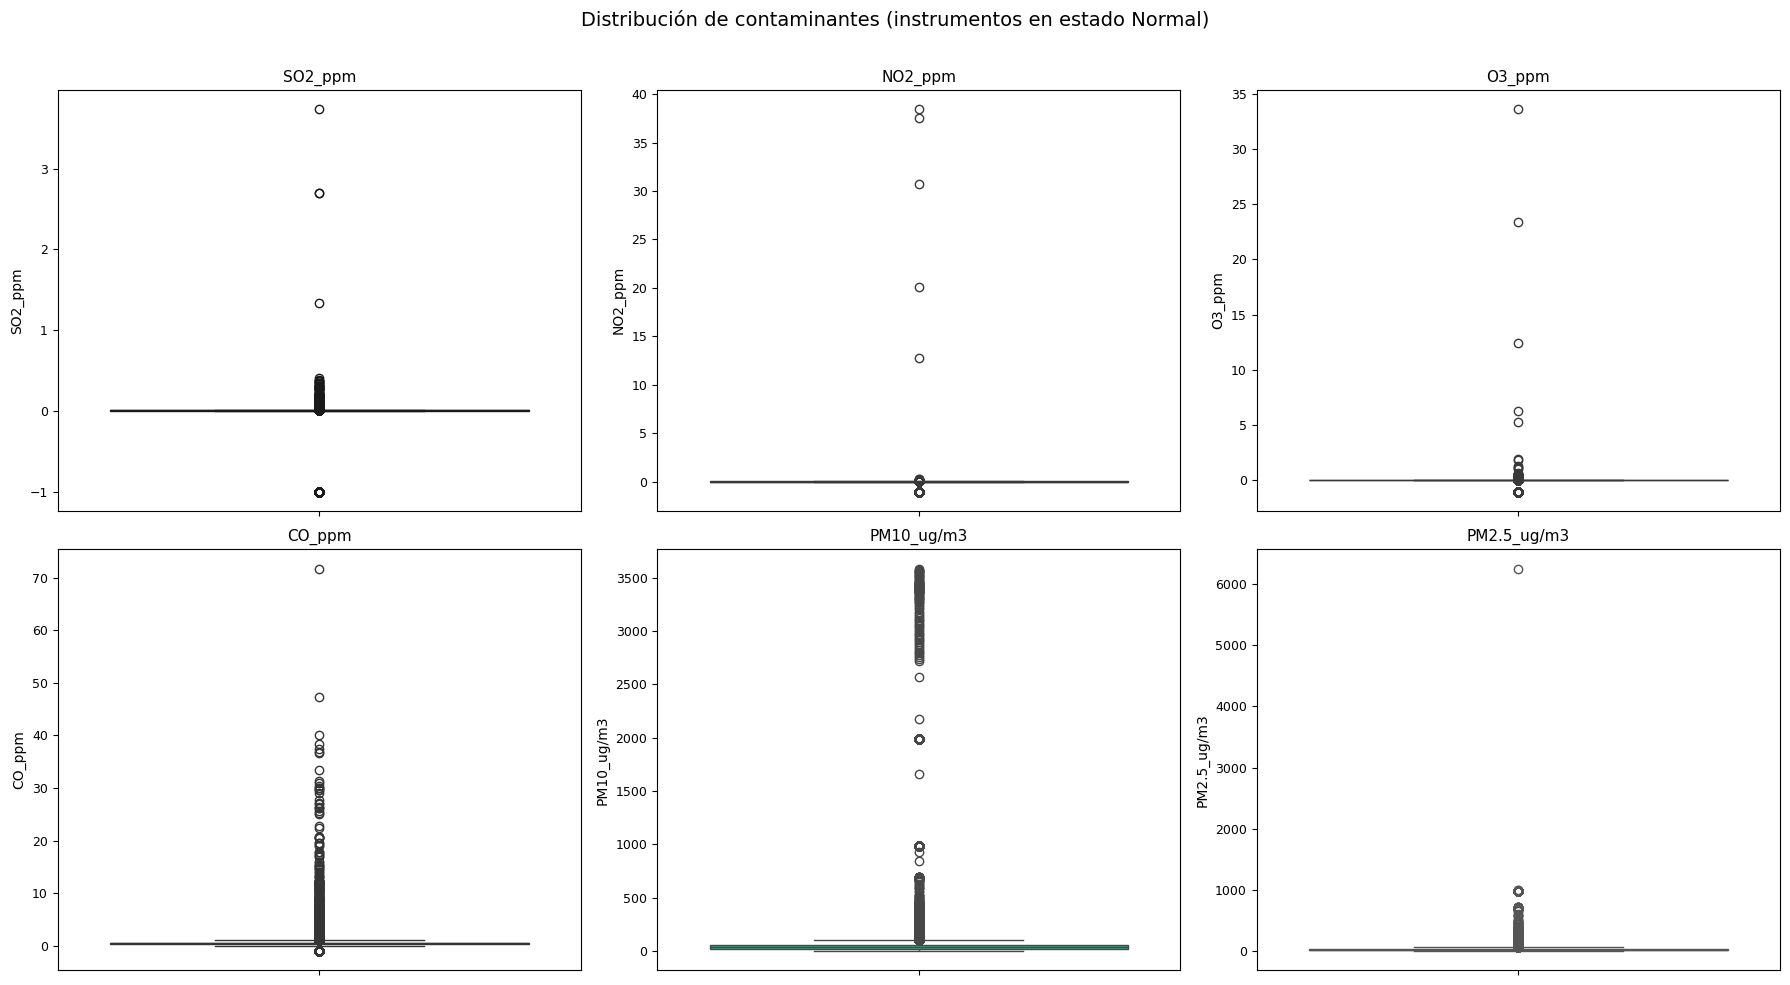

In [15]:
colors = [cm.viridis(i / len(variables)) for i in range(len(variables))]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=df_normal, y=var, ax=axes[i], color=colors[i])
    axes[i].set_title(f"{var}", fontsize=11)
    axes[i].tick_params(axis='y', labelsize=9)

plt.suptitle("Distribución de contaminantes (instrumentos en estado Normal)", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


Podemos observar que aunque la gran mayoria de variables estudiadas tienen un comportamiento normal, presentan unos outliers en relacion a sus valores extremos, como lo son PM2.5 y en algunos casos PM10.

### 3.2.2 Matriz de Correlacion

Tambien haremos una matriz de correlacion para observar la correlacion que existen entre las variables de estudio.

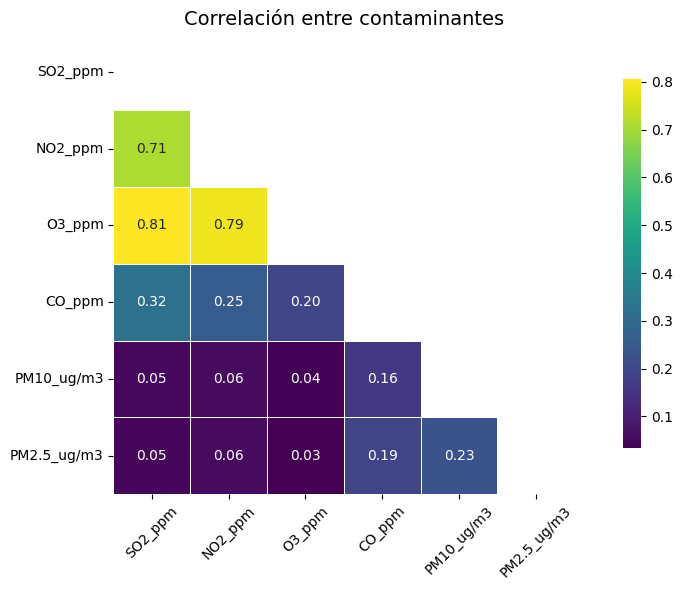

In [16]:
correlacion = df_normal[variables].corr()

mask = np.triu(np.ones_like(correlacion, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, mask=mask, annot=True, cmap="viridis", fmt=".2f",
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlación entre contaminantes", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Se observa que algunos de los contaminantes poseen un nivel de correlacion medio a medio-alto, en gran medida a que estos contaminantes pueden ser expulsados al ambiente por actividades similares,.

### 3.2.3 Analisis Temporal

Teniendo en cuenta que tenemos datos temporales con tiempo, podemos visualizar la evolucion que estos indicadores han tenido con respecto al tiempo. En primera instancia, evaluemos la evoluciond de ambos indicadores PM2.5 y PM10 en el tiempo evaluado durante las mediciones en el dataset.

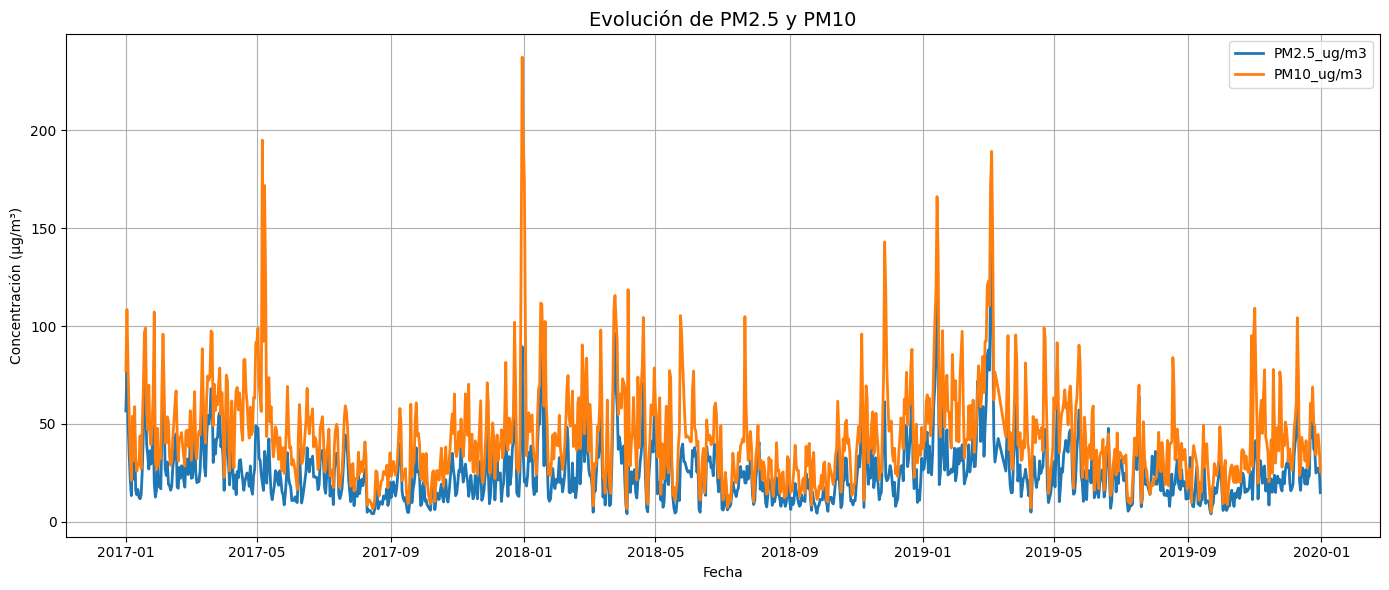

In [17]:
pm_vars = ["PM2.5_ug/m3", "PM10_ug/m3"]
df_diario_pm = df_normal.groupby("fecha")[pm_vars].mean()

plt.figure(figsize=(14, 6))
for var in pm_vars:
    plt.plot(df_diario_pm.index, df_diario_pm[var], label=var, linewidth=2)
plt.title("Evolución de PM2.5 y PM10", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Concentración (μg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Para la grafica anterior, los valores de PM10 suelen oscilar entre 0 y 115 (μg/m³), aunque existen picos estando mayor a 200 (μg/m³). Por su parte, PM2.5 suele estar en promedio menor que PM10, con valores estando dentro de 50 (μg/m³), pero con picos hasta 100 ((μg/m³), de igual manera, se van a tambien graficar de forma individual para confirmar dicho comportamiento planteado.

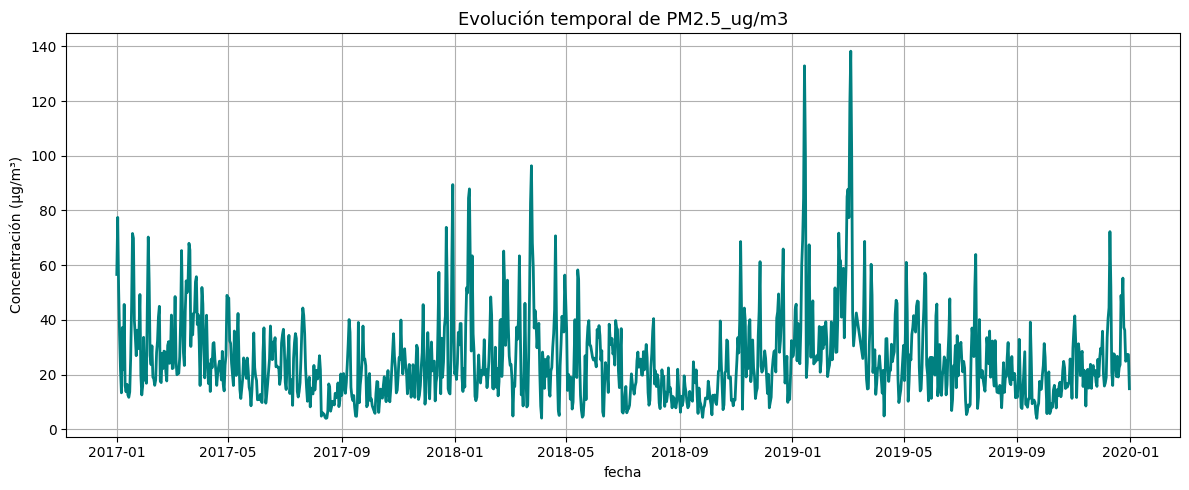

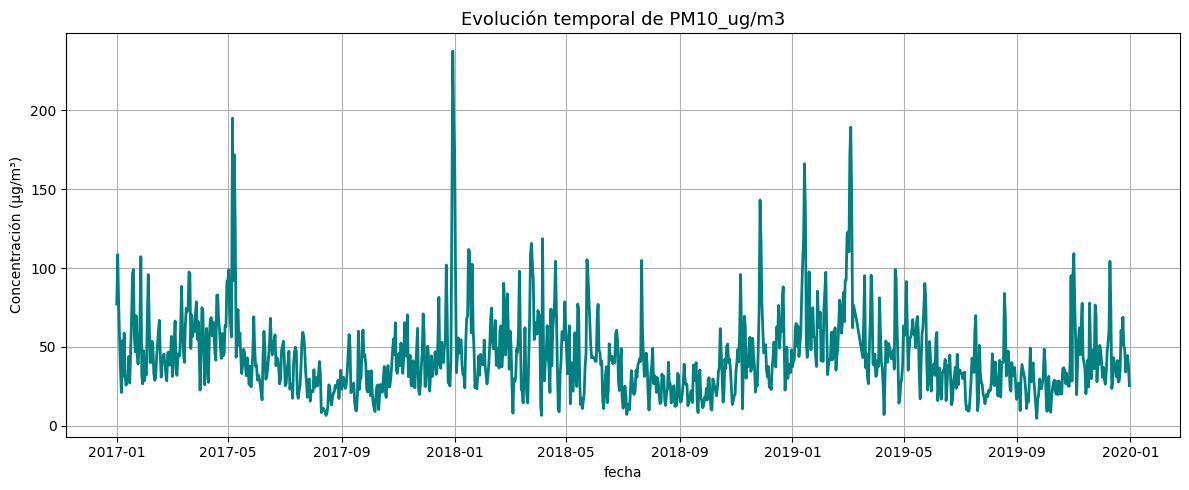

In [18]:
for var in pm_vars:
    plt.figure(figsize=(12, 5))
    plt.plot(df_diario_pm.index, df_diario_pm[var], color='teal', linewidth=2)
    plt.title(f"Evolución temporal de {var}", fontsize=13)
    plt.xlabel("fecha")
    plt.ylabel("Concentración (μg/m³)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Para ambos indicadores, tienen un comportamiento similar, con incrementos en los meses de Enero y decrementos para el mes de Septiembre de cada añombien siguen el comportamiento planteado anterior en relacion a sus valores medios. Con estos indicadores analizados, prosigamos con el resto de indicadores.

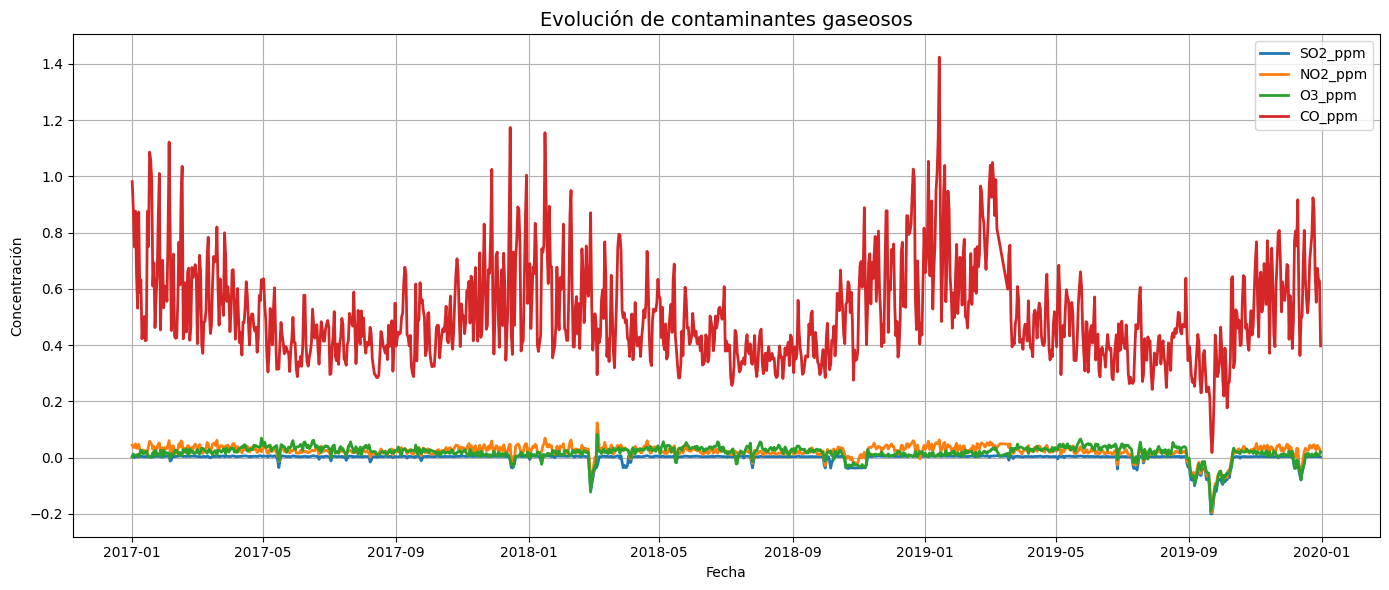

In [19]:
otros_vars = ["SO2_ppm", "NO2_ppm", "O3_ppm", "CO_ppm"]
df_diario_otros = df_normal.groupby("fecha")[otros_vars].mean()

plt.figure(figsize=(14, 6))
for var in otros_vars:
    plt.plot(df_diario_otros.index, df_diario_otros[var], label=var, linewidth=2)
plt.title("Evolución de contaminantes gaseosos", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Concentración")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Para tener un mejor entendimientos, separemos el indicador contaminante CO y analicemos primero el resto de indicadores.

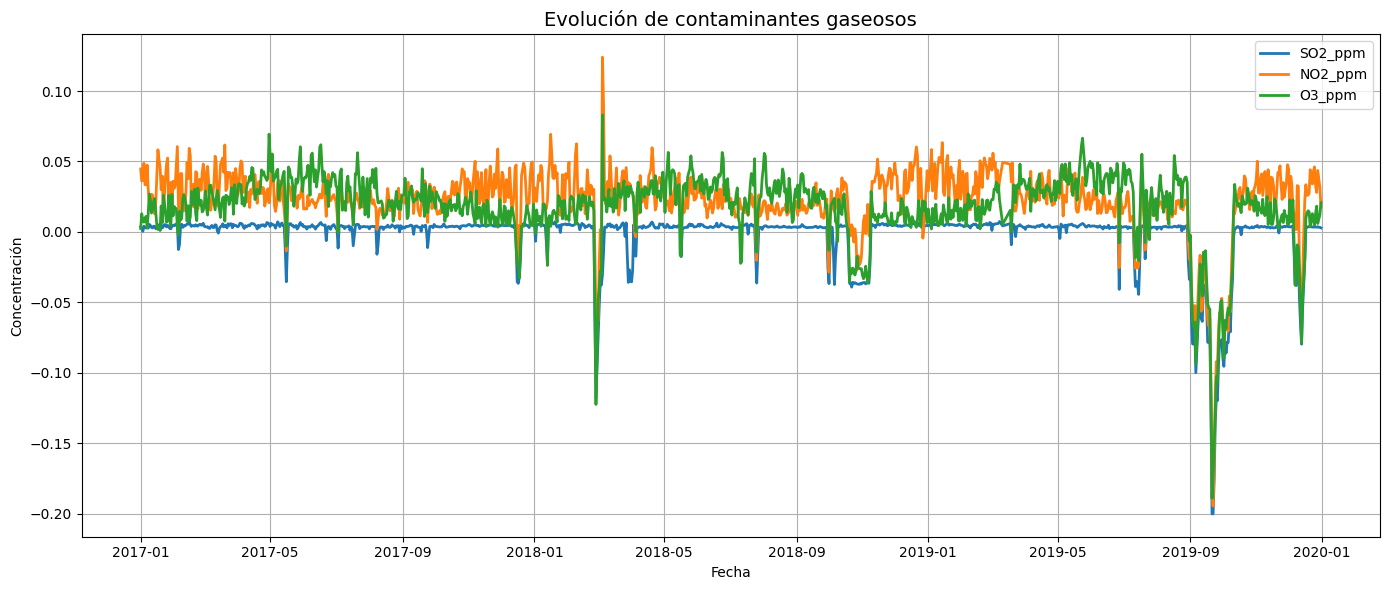

In [20]:
otros_vars = ["SO2_ppm", "NO2_ppm", "O3_ppm"]
df_diario_otros = df_normal.groupby("fecha")[otros_vars].mean()

plt.figure(figsize=(14, 6))
for var in otros_vars:
    plt.plot(df_diario_otros.index, df_diario_otros[var], label=var, linewidth=2)
plt.title("Evolución de contaminantes gaseosos", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Concentración")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Para los contaminantes SO2, NO2 y O3, calculados en partes por millon (PPM), presentan un comportamiento que oscila entre 0 y 0.06. Para SO2 especialmente, este no suele tener mucha variabilidad. Para los meses de enero, la concentracion de NO2 sube mientras que O3 suele ser menor, y este comportamiento es evidenciado en los varios años del dataset. Curiosamente, existe un evento aproximadamente en Septiembre de 2019 que causo que los tres indicadores presentes tuvieran valores por debajo de su estimado historico. 

De forma analoga a lo anterior, tambien tendremos una visualizacion individual para los indicadores a continuacion.

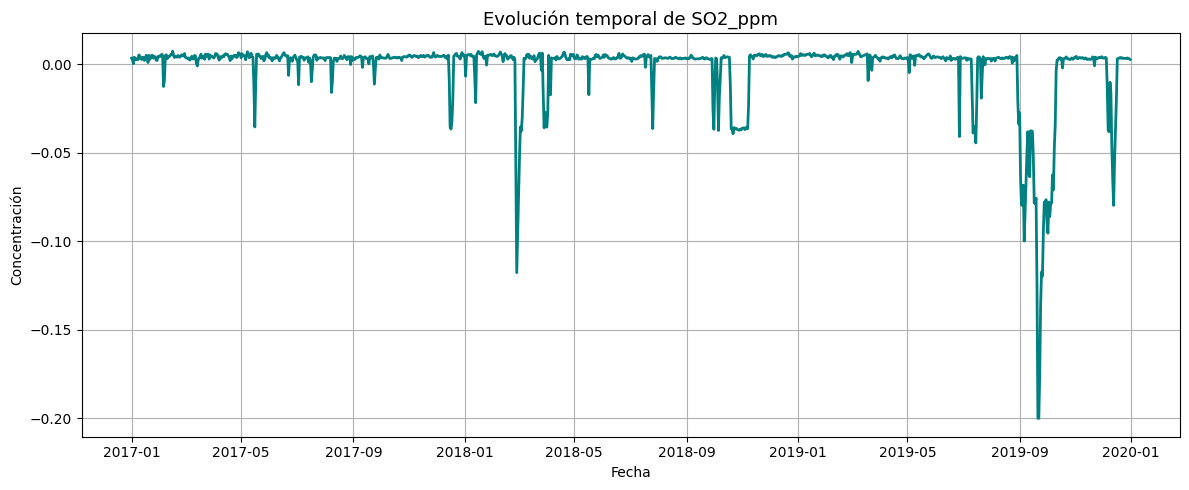

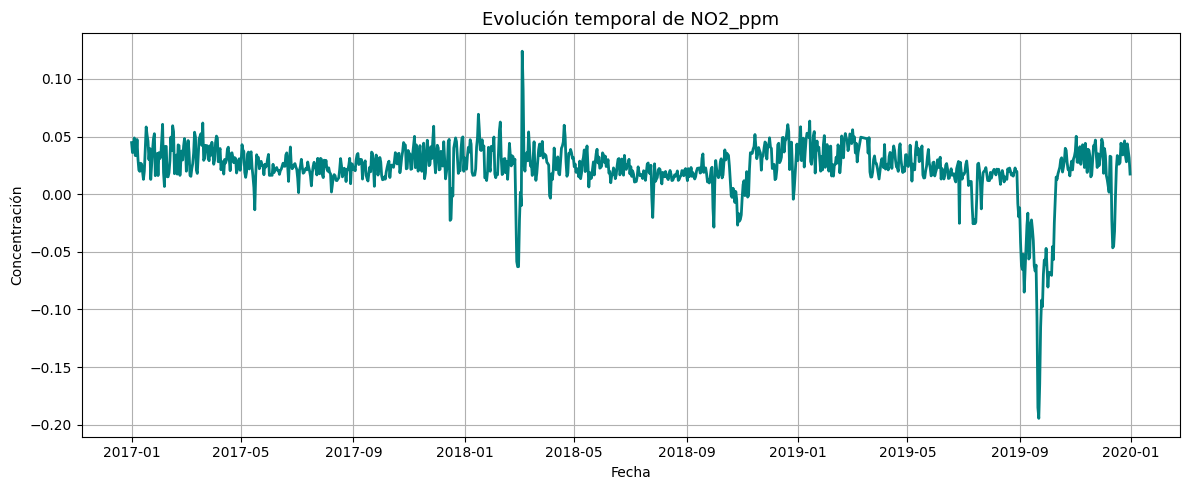

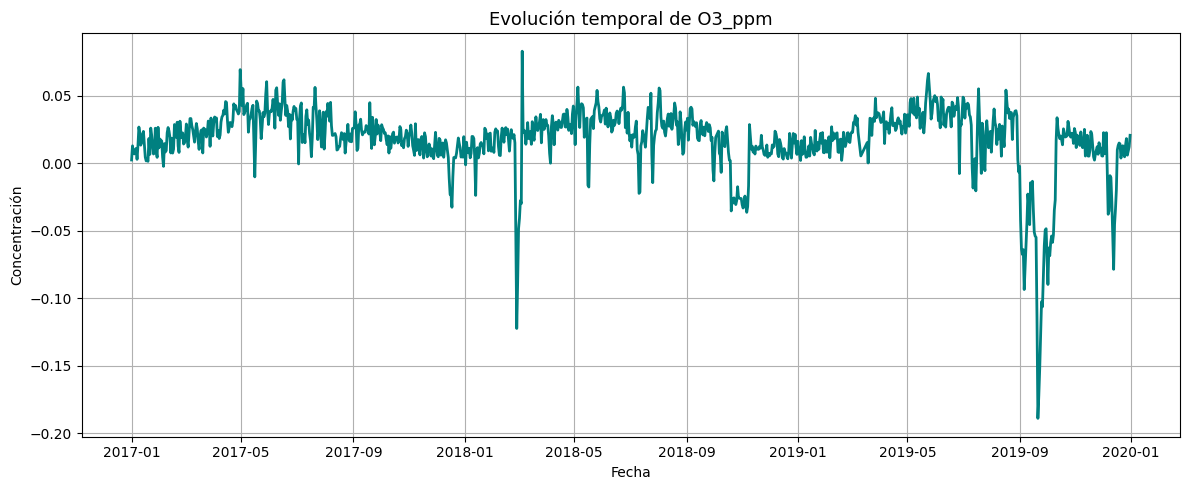

In [21]:
for var in otros_vars:
    plt.figure(figsize=(12, 5))
    plt.plot(df_diario_otros.index, df_diario_otros[var],color='teal', linewidth=2)
    plt.title(f"Evolución temporal de {var}", fontsize=13)
    plt.xlabel("Fecha")
    plt.ylabel("Concentración")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

De lo anterior, el indicador faltante por analizar fue CO, en PPM. Este indicador tambien tiene incrementos en los meses de Enero de cada año y decrementos y su punto mas bajo en el mes de Septiembre. Tambien se puede observar el evento en el mes de Septiembre del año 2019, asi como afecto a los indicadores ya estudiados.

### 3.2.4 Diagramas de barras variados

A continuacion, se va a observar la prevalencia de los indicadores PM10 y PM2.5 en las diferentes estaciones registradas, organizado por una concentracion media mas alta de forma descendente.

C:\Users\taran\AppData\Local\Temp\ipykernel_3252\176853832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


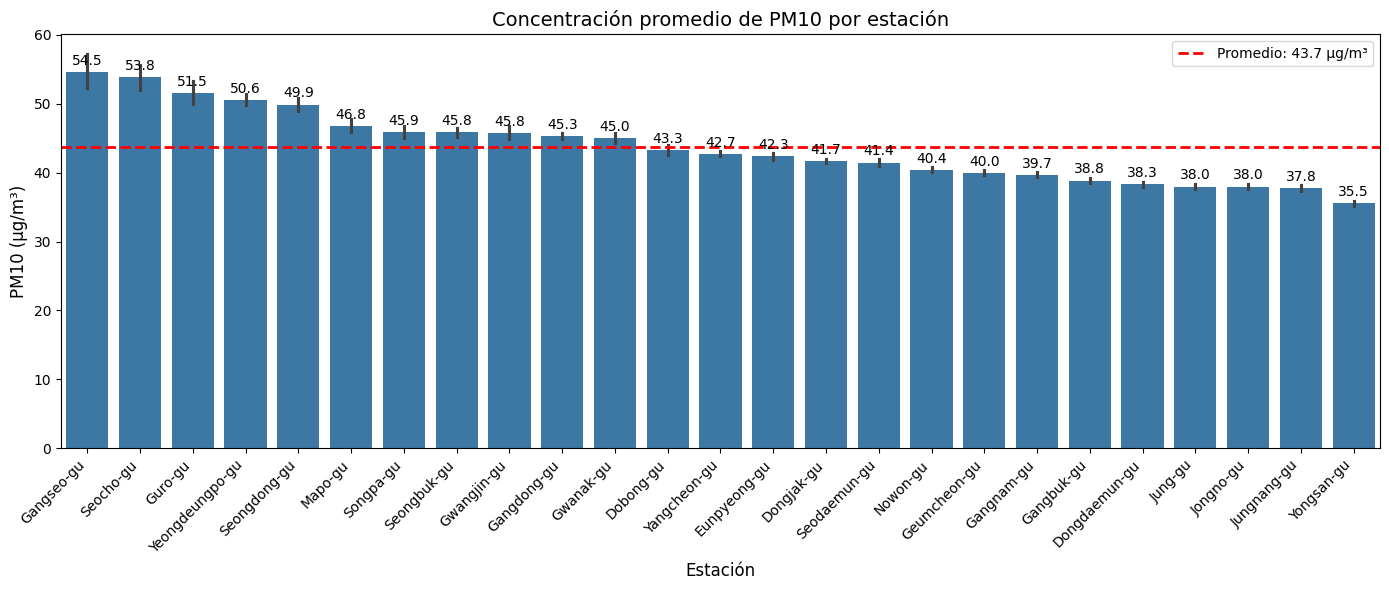

In [22]:
plt.figure(figsize=(14, 6))

ax = sns.barplot(
    data=df_final,
    x="nombre_estacion",
    y="PM10_ug/m3",
    palette=[ "#2c7bb6" ] * df_final["nombre_estacion"].nunique(),
    order=df_final.groupby("nombre_estacion")["PM10_ug/m3"].mean().sort_values(ascending=False).index
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10, padding=3)

pm10_promedio = df_final["PM10_ug/m3"].mean()

plt.axhline(pm10_promedio, color="red", linestyle="--", linewidth=2, label=f"Promedio: {pm10_promedio:.1f} µg/m³")

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Concentración promedio de PM10 por estación", fontsize=14)
plt.xlabel("Estación", fontsize=12)
plt.ylabel("PM10 (µg/m³)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

De lo anterior, la estacion Gangseo-gu mantiene el mayor promedio de concentracion de PM10 durante el periodo de medicion del dataset, no obstante, no existe mucha variabilidad significativa entre la mayoria de las estaciones. El promedio general entre todas las estaciones fue de 43.7 µg/m³.

C:\Users\taran\AppData\Local\Temp\ipykernel_3252\1065292846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


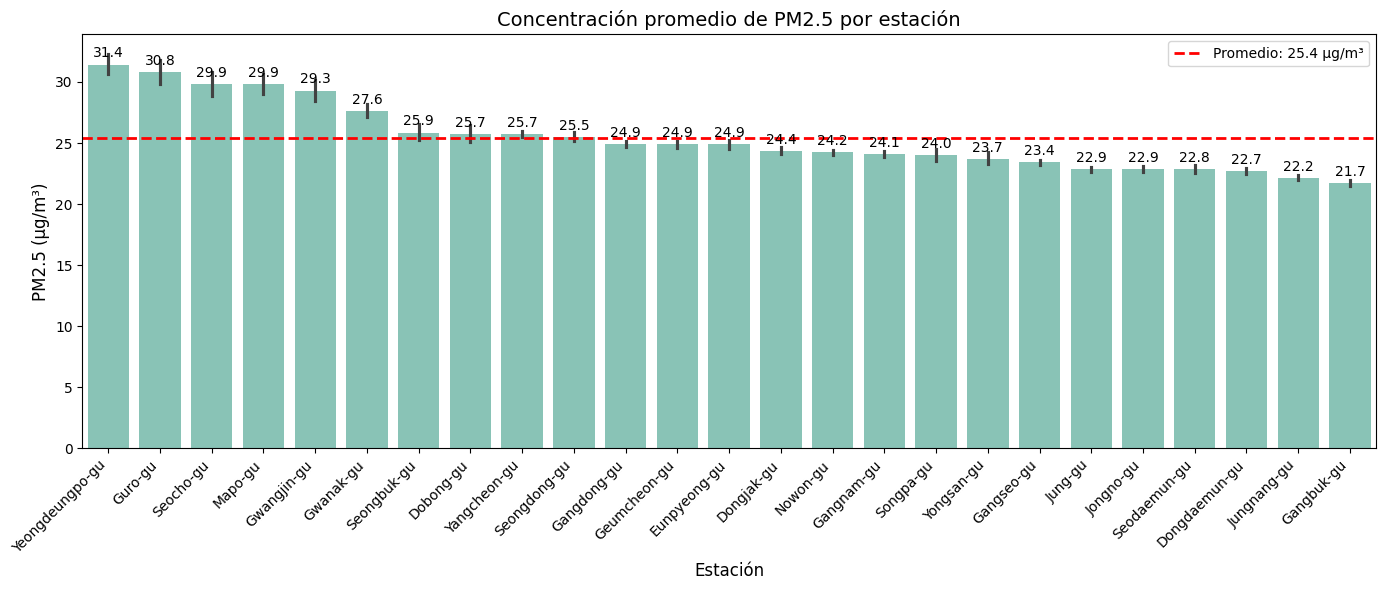

In [23]:
plt.figure(figsize=(14, 6))

ax = sns.barplot(
    data=df_final,
    x="nombre_estacion",
    y="PM2.5_ug/m3",
    palette=[ "#7fcdbb" ] * df_final["nombre_estacion"].nunique(),  
    order=df_final.groupby("nombre_estacion")["PM2.5_ug/m3"].mean().sort_values(ascending=False).index
)
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10, padding=3)

pm25_promedio = df_final["PM2.5_ug/m3"].mean()

plt.axhline(pm25_promedio, color="red", linestyle="--", linewidth=2, label=f"Promedio: {pm25_promedio:.1f} µg/m³")

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Concentración promedio de PM2.5 por estación", fontsize=14)
plt.xlabel("Estación", fontsize=12)
plt.ylabel("PM2.5 (µg/m³)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

Para la unidad de PM2.5, la estacion con mayor concentracion fue Yeongdeungpo-gu, con un promedio de 31.4 unidades de PM2.5 (µg/m³). El promedio de entre todas las estaciones tambien fue de 25.4 (µg/m³) de PM2.5.

Finalmente, tambien podemos hacer un analisis considerando ambas metricas para las estaciones de estudio.

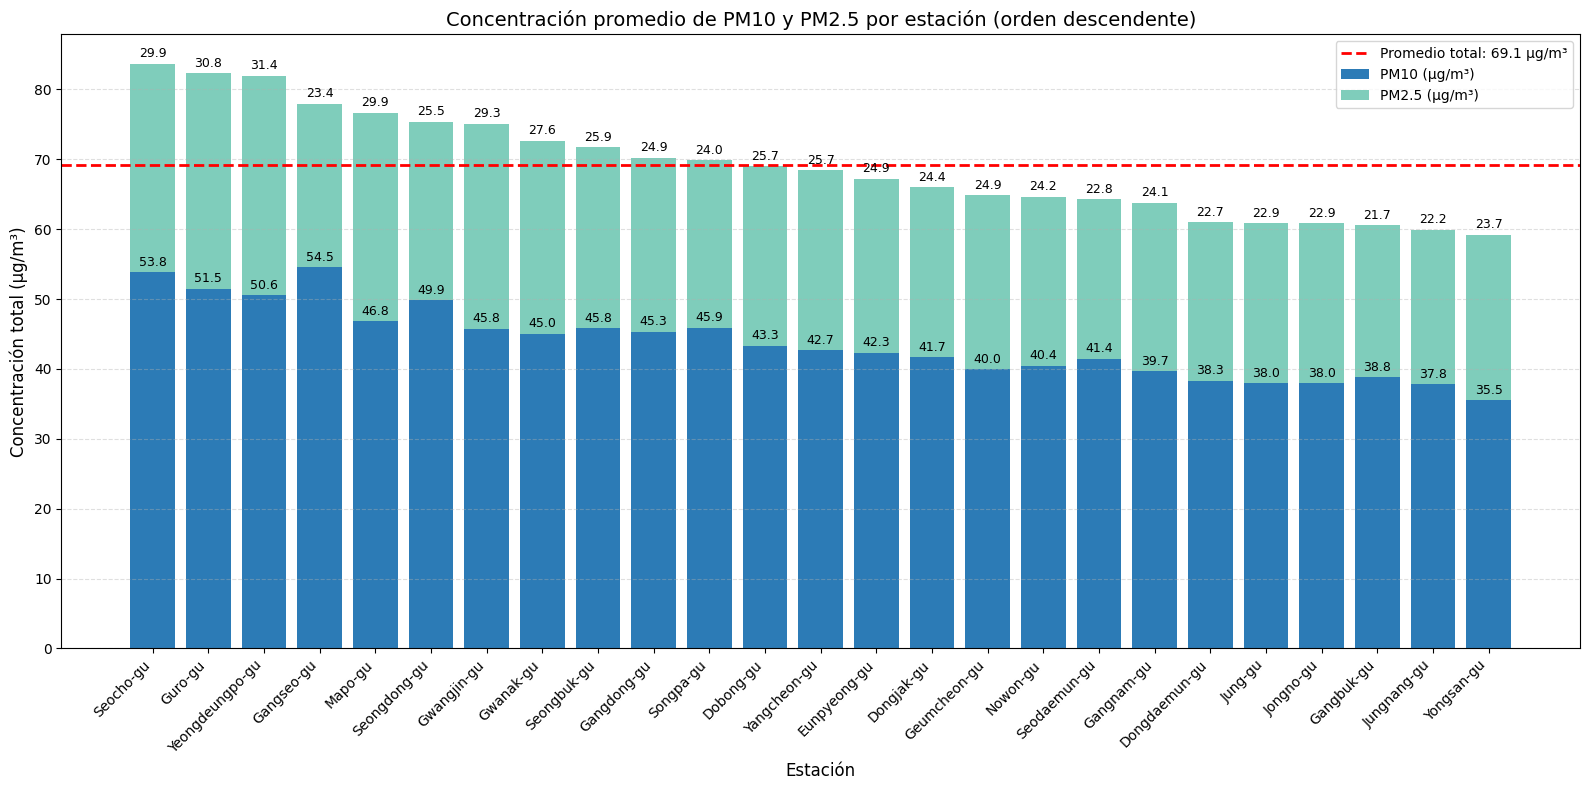

In [24]:
df_avg = df_final.groupby("nombre_estacion")[["PM10_ug/m3", "PM2.5_ug/m3"]].mean()

df_avg["promedio_total"] = df_avg.mean(axis=1)

df_avg_sorted = df_avg.sort_values("promedio_total", ascending=False)

promedio_total_combinado = df_avg_sorted["PM10_ug/m3"].add(df_avg_sorted["PM2.5_ug/m3"]).mean()

plt.figure(figsize=(16, 8))

color_pm10 = "#2c7bb6" 
color_pm25 = "#7fcdbb"  

bars_pm10 = plt.bar(df_avg_sorted.index, df_avg_sorted["PM10_ug/m3"], 
                    label="PM10 (µg/m³)", color=color_pm10)

bars_pm25 = plt.bar(df_avg_sorted.index, df_avg_sorted["PM2.5_ug/m3"], 
                    bottom=df_avg_sorted["PM10_ug/m3"], label="PM2.5 (µg/m³)", color=color_pm25)

for i, est in enumerate(df_avg_sorted.index):
    pm10_val = df_avg_sorted.loc[est, "PM10_ug/m3"]
    pm25_val = df_avg_sorted.loc[est, "PM2.5_ug/m3"]
    
    plt.text(i, pm10_val + 0.5, f"{pm10_val:.1f}", ha="center", va="bottom", fontsize=9, color="black")
    
    plt.text(i, pm10_val + pm25_val + 0.5, f"{pm25_val:.1f}", ha="center", va="bottom", fontsize=9, color="black")

plt.axhline(promedio_total_combinado, color="red", linestyle="--", linewidth=2, 
            label=f"Promedio total: {promedio_total_combinado:.1f} µg/m³")

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.ylabel("Concentración total (µg/m³)", fontsize=12)
plt.xlabel("Estación", fontsize=12)
plt.title("Concentración promedio de PM10 y PM2.5 por estación (orden descendente)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

De estas, las estaciones Seocho-gu y Guro-gu fueron las que mas tuvieron, en terminos de media conjunta, la mayor concentracion de ambos indicadores. Las estaciones de Jungnang-gu y Yongsan-gu fueron las que tuvieron menor nivel, respectivamente. El promedio para estas estaba en 69.1 µg/m³.

Junto a lo anterior, podemos visualizar que porcentaje de las evaluaciones de cada estacion fueron evaluadas dependiendo del estado del equipo con el cual se evaluo.

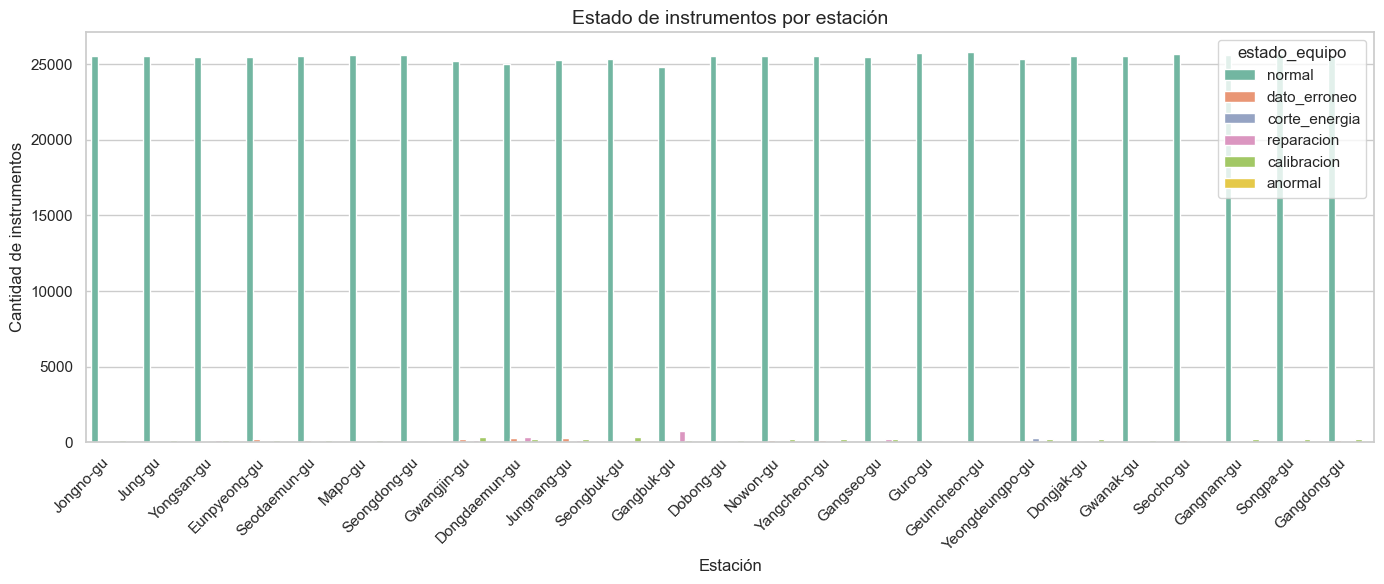

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(
    data=df_final,
    x="nombre_estacion",
    hue="estado_equipo", 
    palette="Set2"
)

plt.title("Estado de instrumentos por estación", fontsize=14)
plt.xlabel("Estación", fontsize=12)
plt.ylabel("Cantidad de instrumentos", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


En gran parte, las estaciones no tuvieron problemas con sus equipos, sin embargo, existen ciertas particularidades:

- La estacion de Gwangjin-gu tuvo etapas de datos erroneos y de calibracion de equipo.
- De forma casi analoga, la estacion Dongdaemun-gu tuvo lo mismo que Gwangjin-gu, y ademas tuvo un periodo de reparacion.
- Seongbuk-gu y Gangbuk-gu tuvieron periodos altos de tanto calibracion y reparacion, respectivamente.

### 3.2.5 Analisis individual promediado por año

Para lo siguiente, se hizo un promedio mensual para los indicadores, parecido al Analisis Temporal de 3.2.3, se observa la evolucion promediada que estos indicadores han tenido con relacion a los doce meses del año.

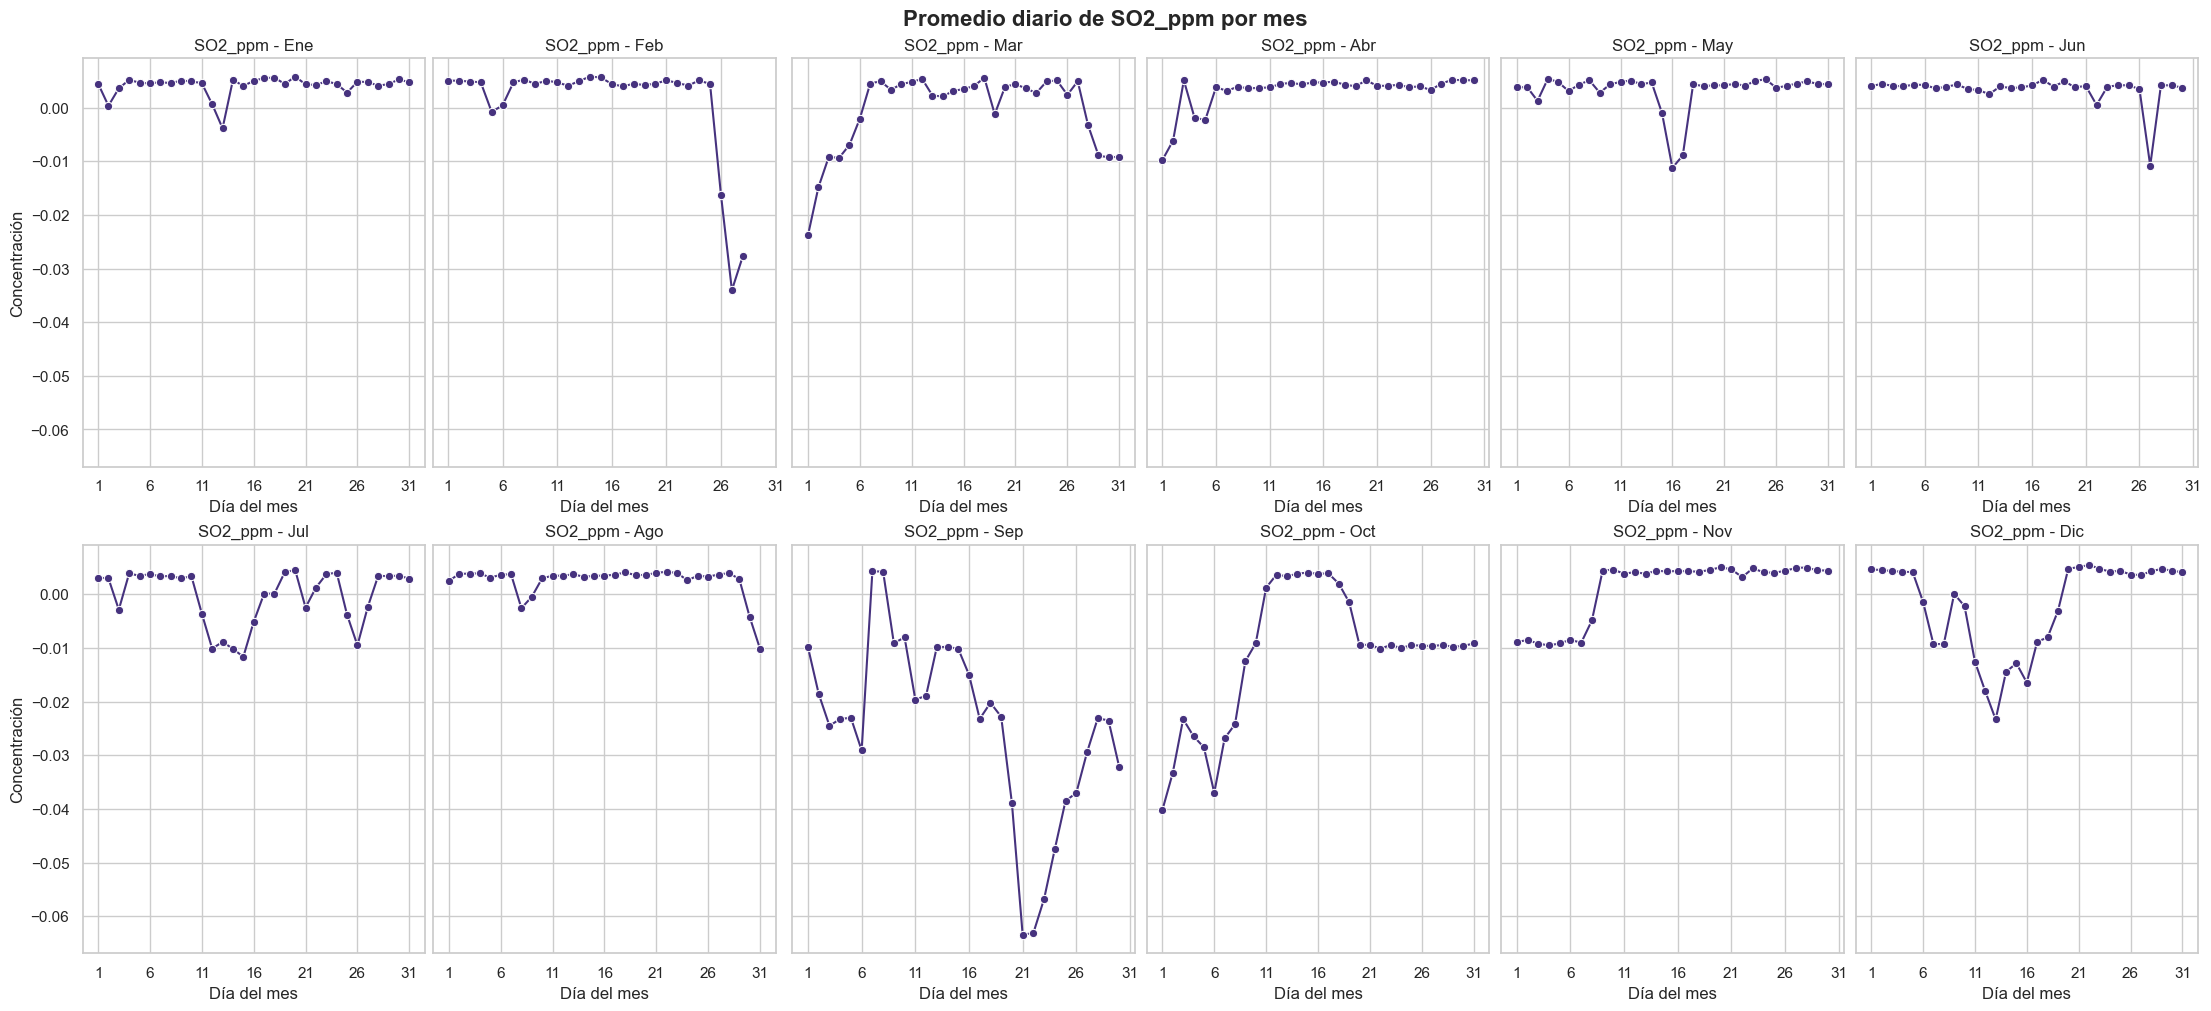

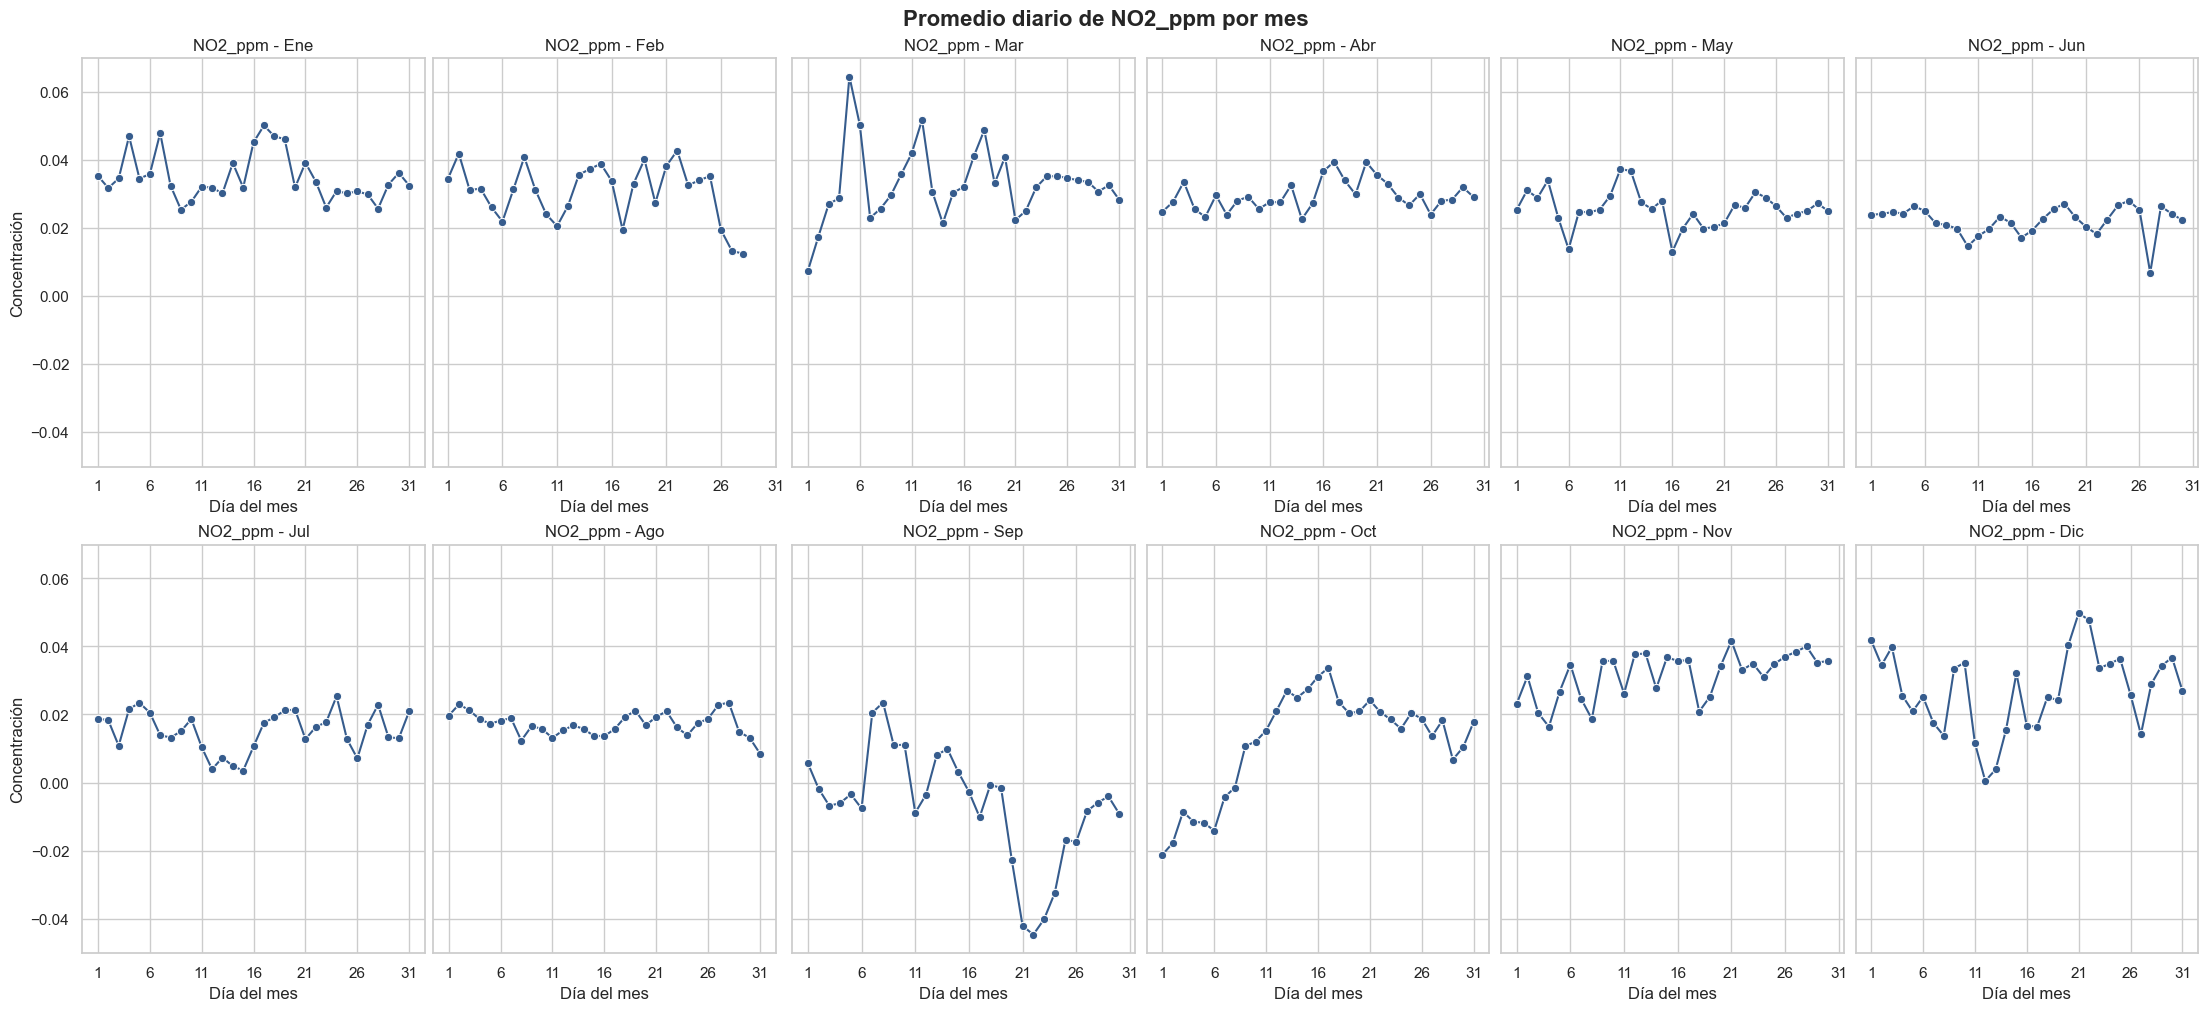

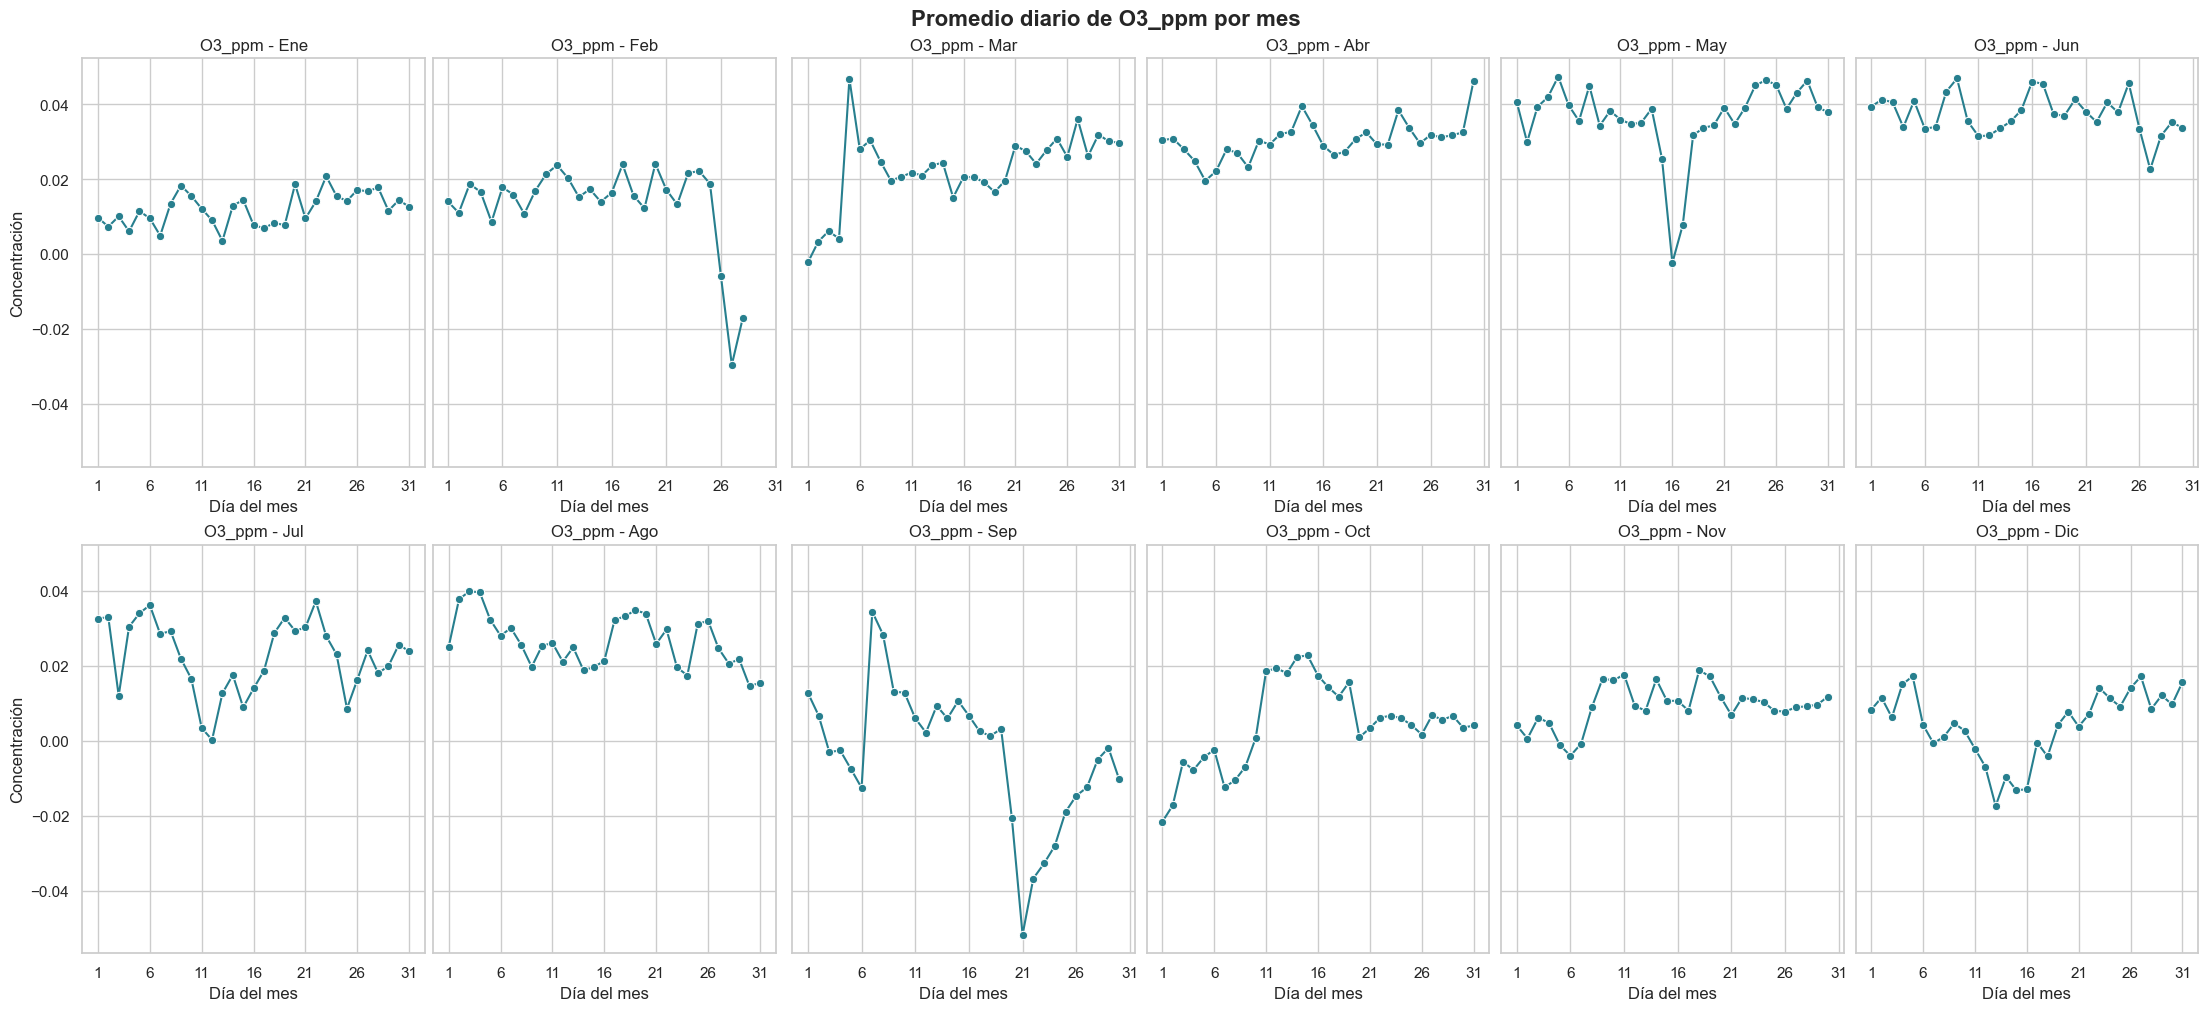

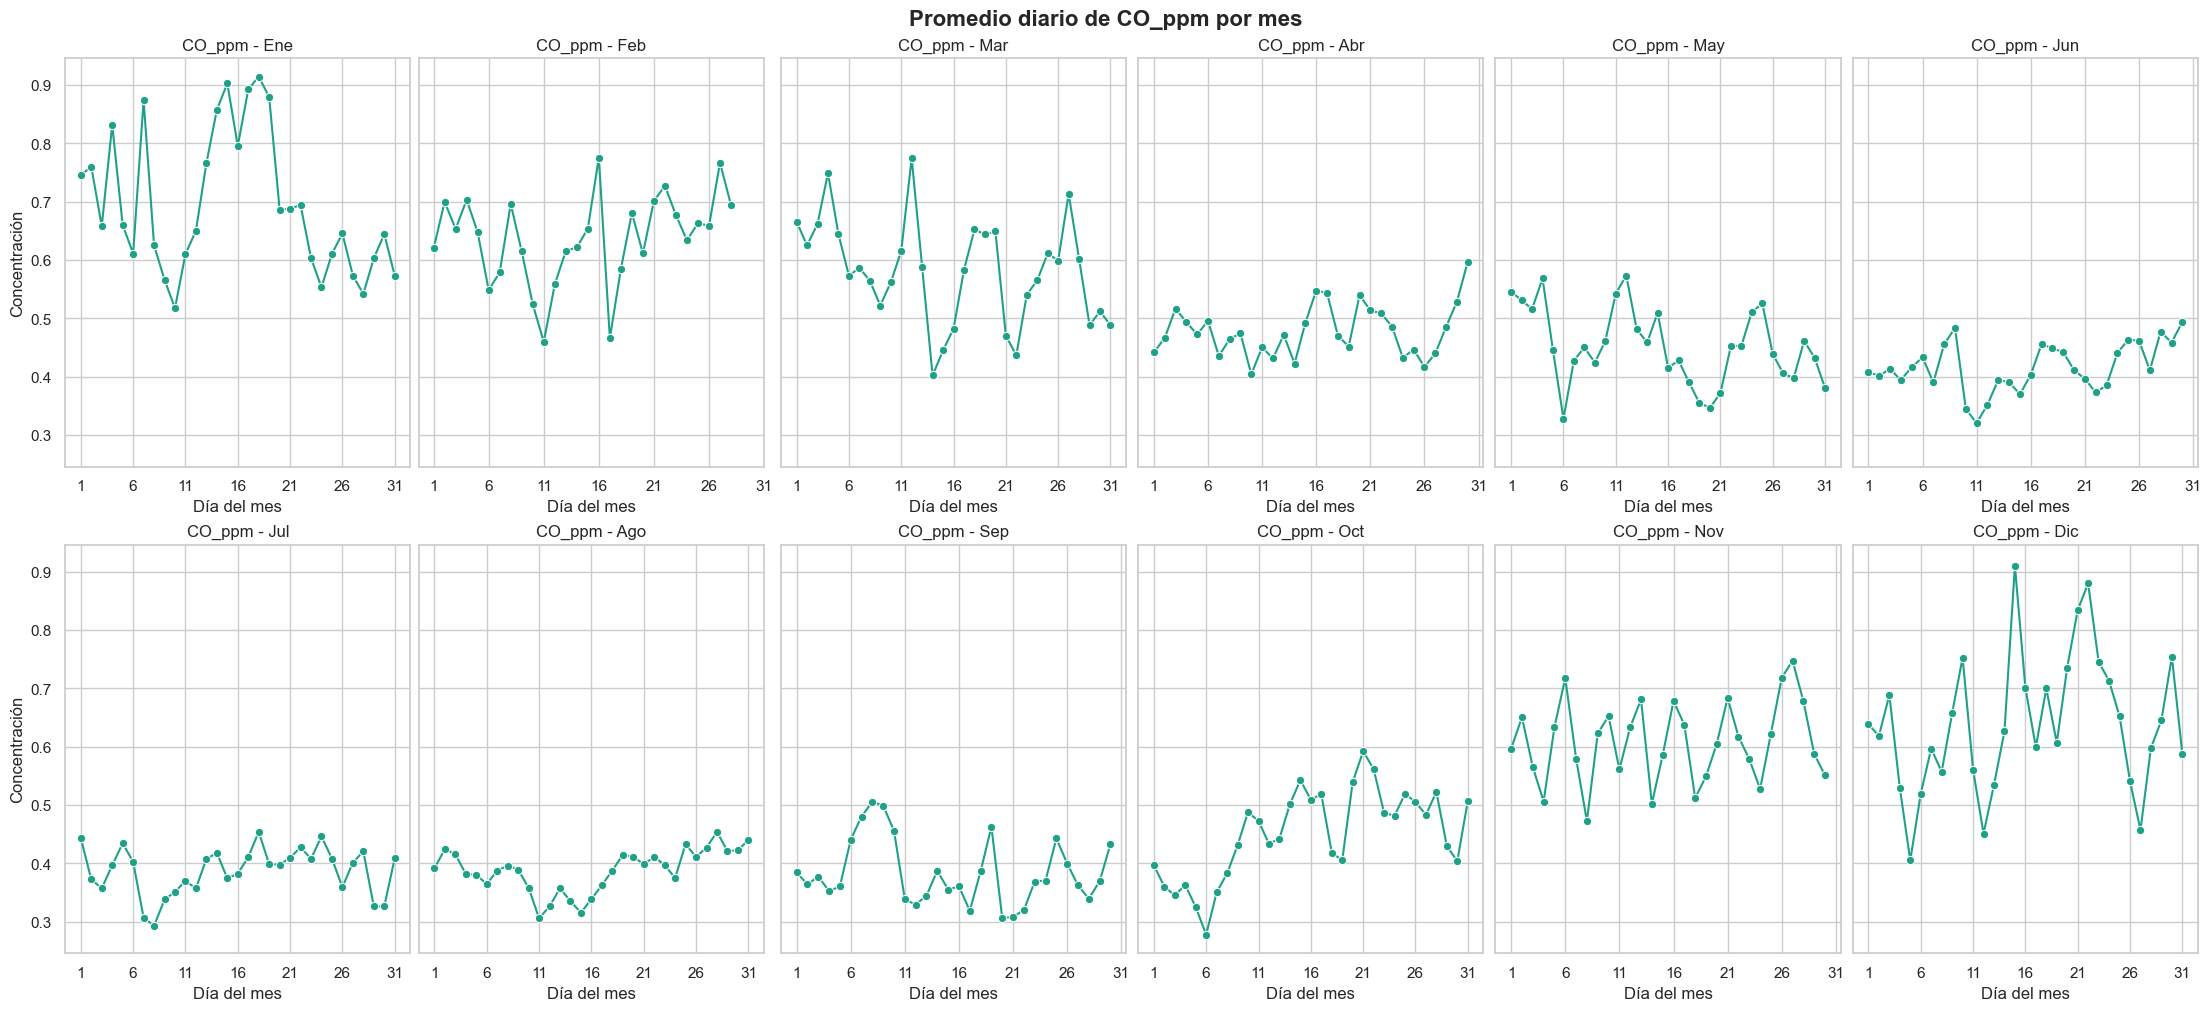

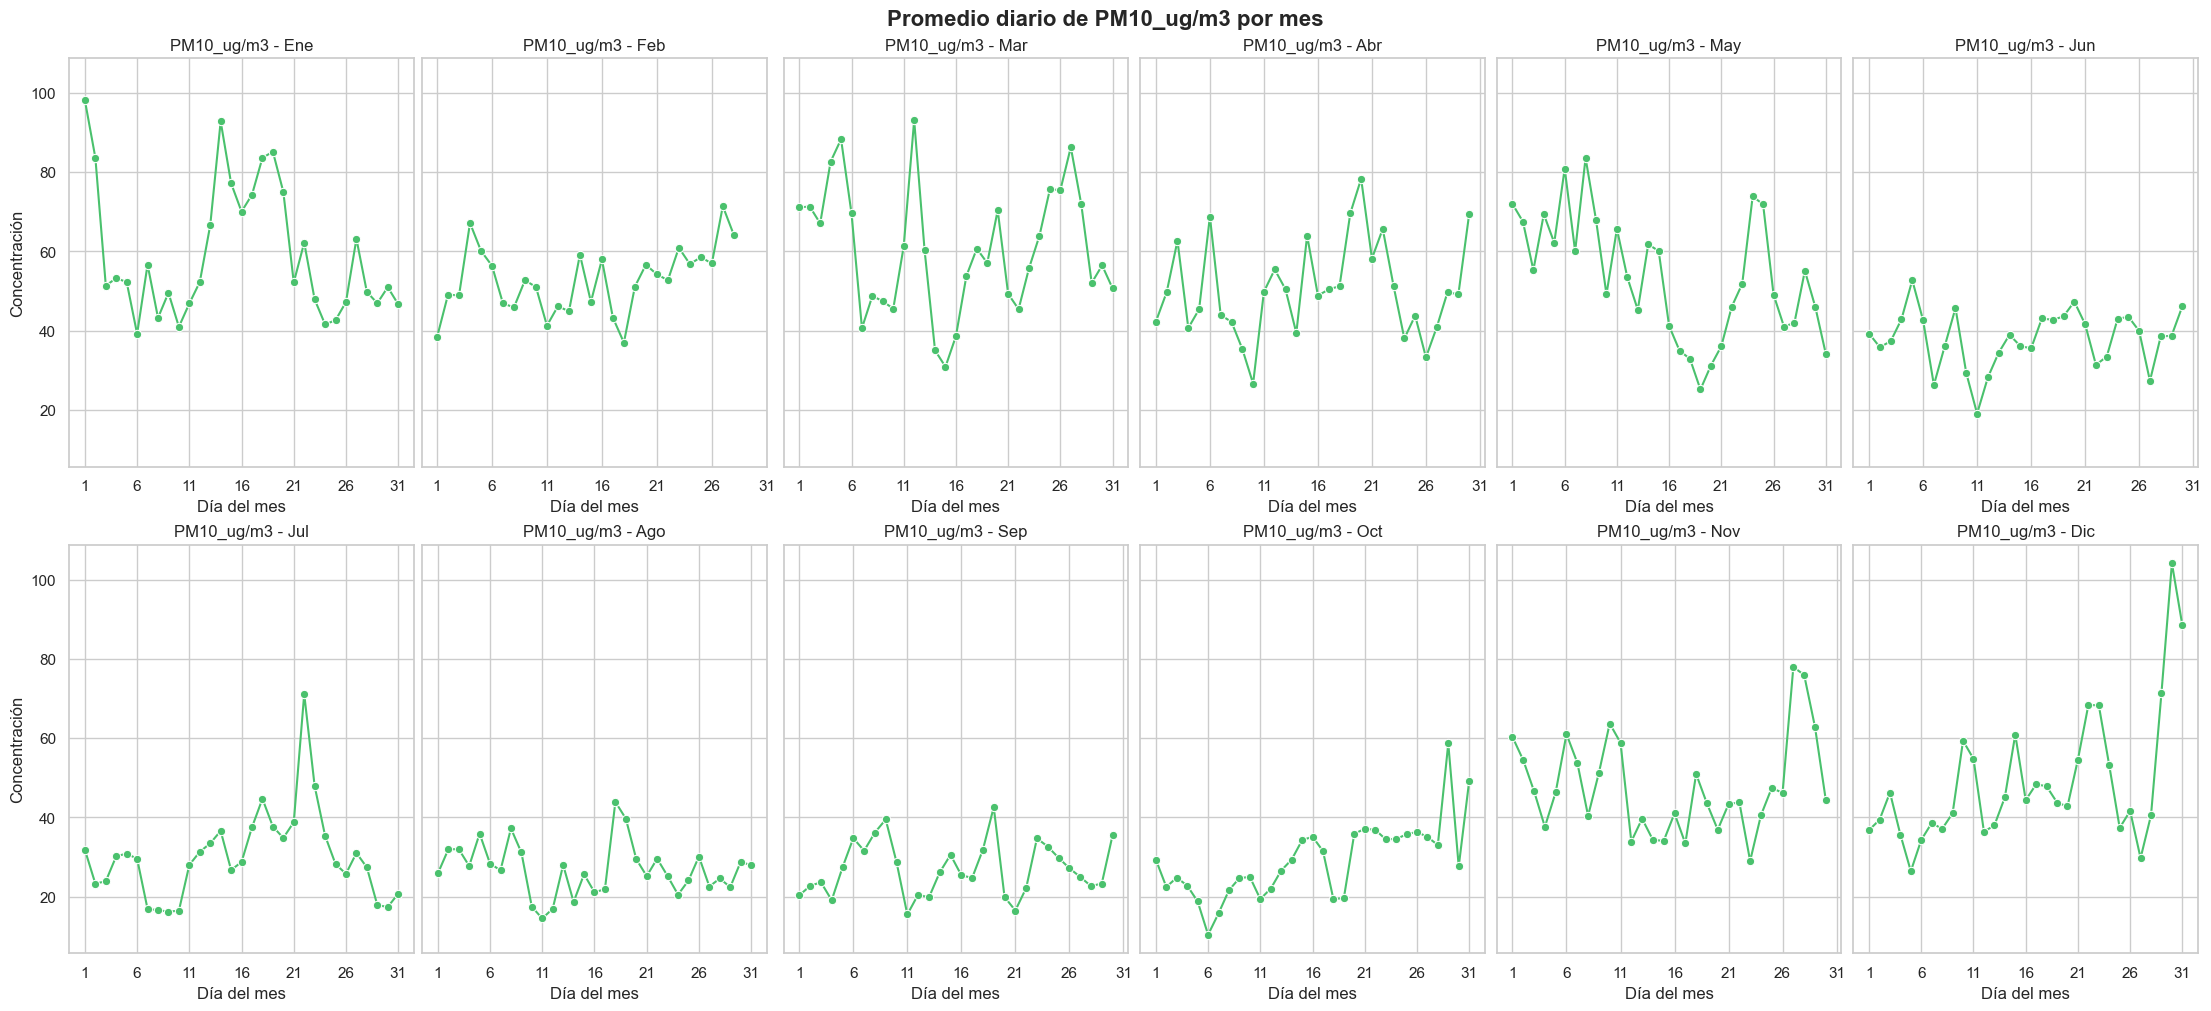

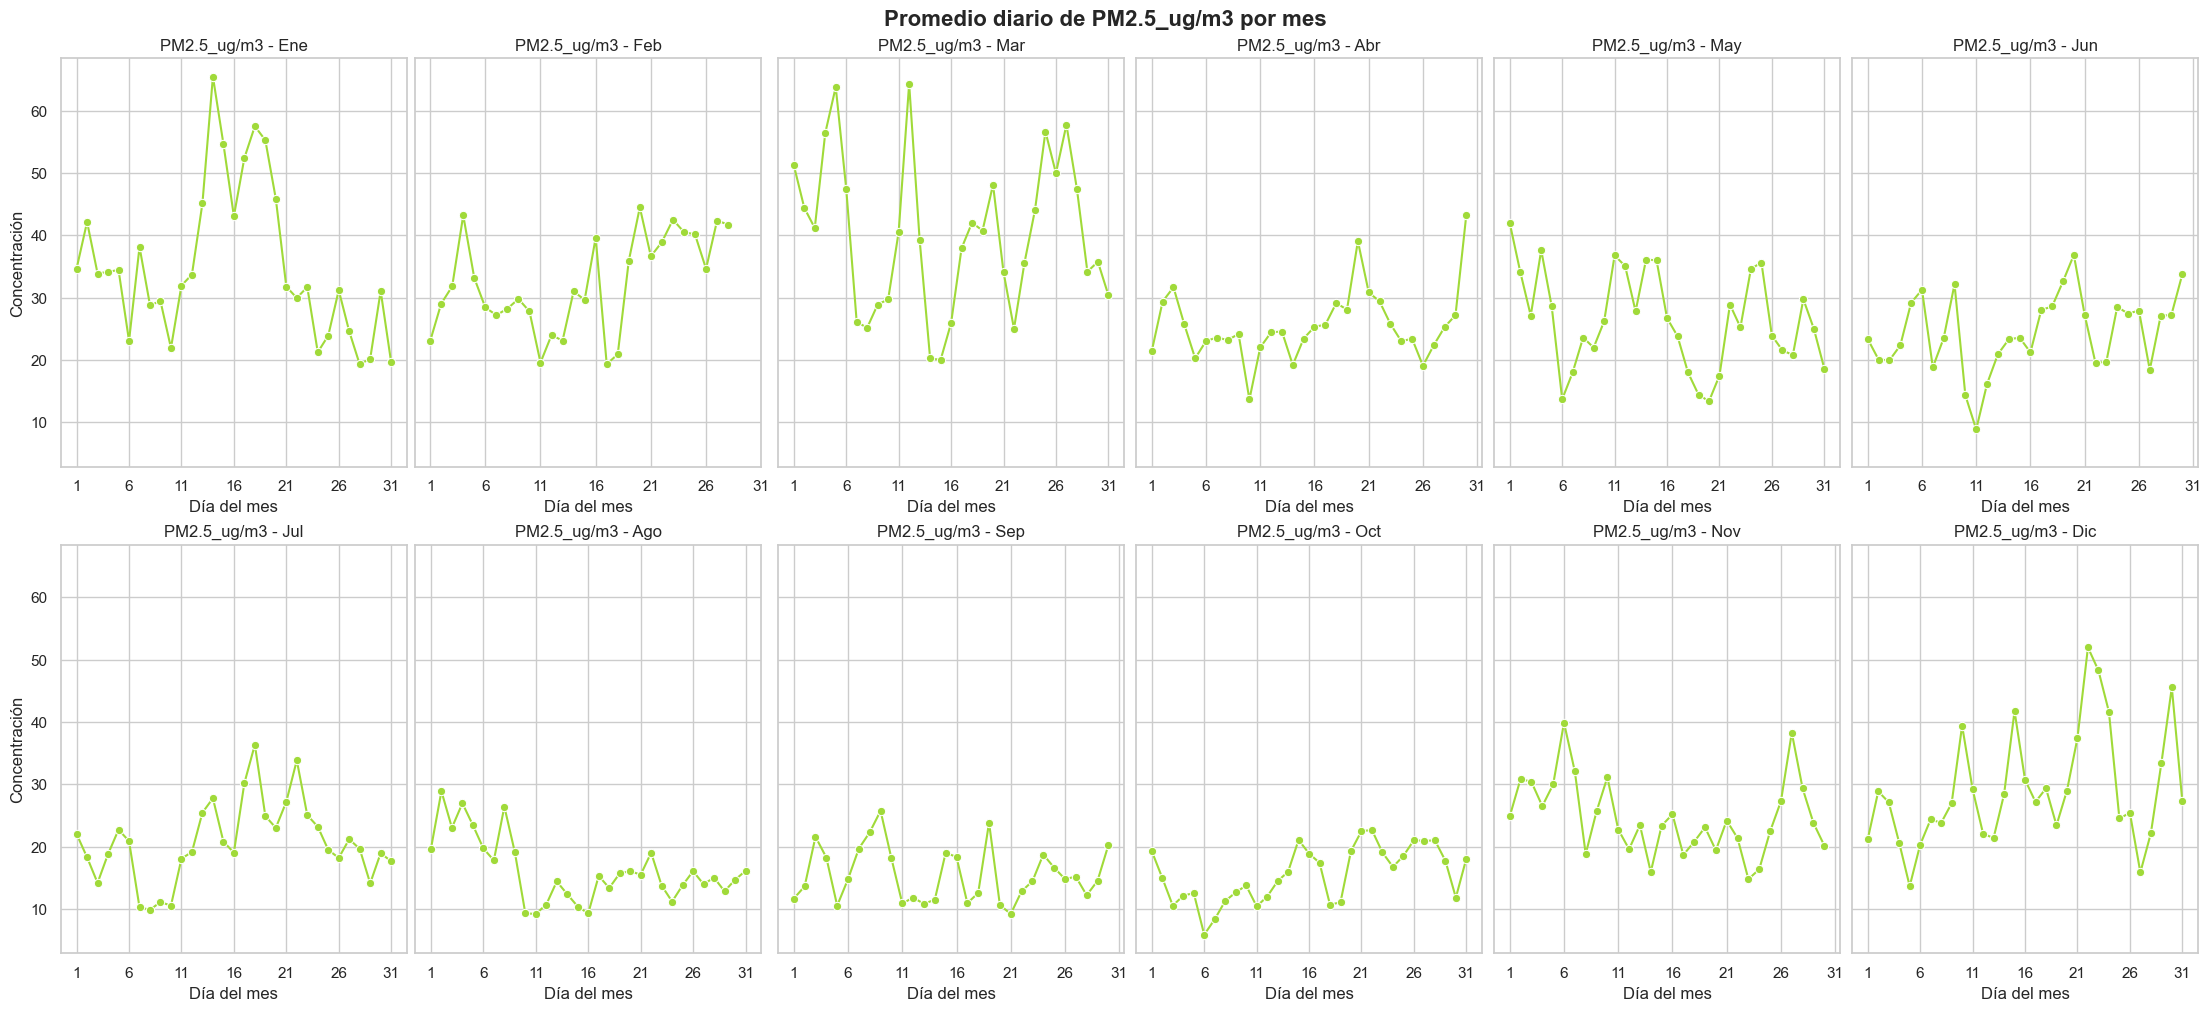

In [27]:
pollutants = ["SO2_ppm", "NO2_ppm", "O3_ppm", "CO_ppm", "PM10_ug/m3", "PM2.5_ug/m3"]

for p in pollutants:
    df_final[p] = pd.to_numeric(df_final[p], errors="coerce")

df_final["mes"] = pd.to_datetime(df_final["fecha"], errors="coerce").dt.month
df_final["dia"] = pd.to_datetime(df_final["fecha"], errors="coerce").dt.day

sns.set(style="whitegrid")

for idx, pollutant in enumerate(pollutants):
    fig, axes = plt.subplots(2, 6, figsize=(22, 10), sharey=True, constrained_layout=True)
    axes = axes.flatten()

    for i in range(12):
        mes_data = df_final[df_final["mes"] == i + 1]
        daily_avg = mes_data.groupby("dia")[pollutant].mean().reset_index()

        sns.lineplot(
            data=daily_avg,
            x="dia",
            y=pollutant,
            ax=axes[i],
            marker="o",
            color=sns.color_palette("viridis", 6)[idx]
        )
        axes[i].set_title(f"{pollutant} - {['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'][i]}")
        axes[i].set_xticks(range(1, 32, 5))
        axes[i].set_xlabel("Día del mes")
        axes[i].set_ylabel("Concentración")
        axes[i].grid(True)

    fig.suptitle(f"Promedio diario de {pollutant} por mes", fontsize=16, fontweight="bold")
    plt.show()

Tambien, se hizo una distribucion de los equipos evaluados, para observar la distribucion de los equipso y su capacidad de medicion.

C:\Users\taran\AppData\Local\Temp\ipykernel_3252\1590410711.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


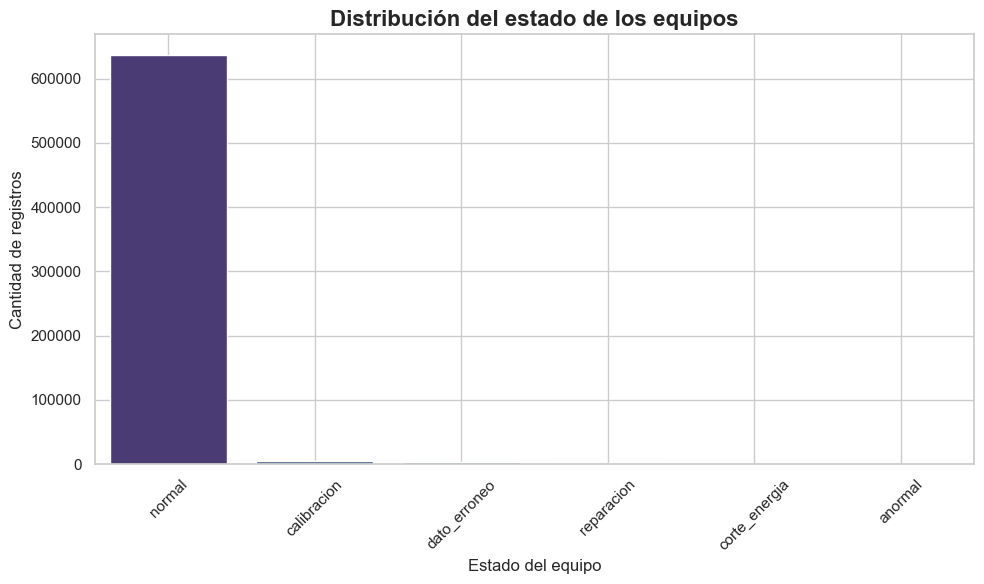

In [28]:
estado_counts = df_final["estado_equipo"].value_counts().reset_index()
estado_counts.columns = ["estado_equipo", "Frecuencia"]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=estado_counts,
    x="estado_equipo",
    y="Frecuencia",
    palette="viridis"
)
plt.title("Distribución del estado de los equipos", fontsize=16, fontweight="bold")
plt.xlabel("Estado del equipo")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Las buenas notician remarcan que la gran mayoria de los datos tomados por los equipos estan en buen estado, con un margen muy poco bajo la clasificacion de maquinas en calibracion, seguido de datos tomados erroneamente, reparaciones, cortes de energia y equipos que registren datos anormales.

## 3.3 Resumenes numericos y estadisticos

Finalmente, se hara un resumen estadistico sobre las variables de estudio. Este incluira medidas de tendencia central como lo son la media, moda, mediana. Ademas, incluira pruebas de normalidad, curtosis, asimetria, coeficientes de variacion, sesgo y p-valor.

In [29]:
resultados = []

for c in variables:
    datos = pd.to_numeric(df_final[c], errors="coerce").dropna()
    
    media = datos.mean()
    mediana = datos.median()
    std = datos.std()
    minimo = datos.min()
    maximo = datos.max()
    nulos = df_final[c].isna().sum()
    moda = datos.mode().iloc[0] if not datos.mode().empty else np.nan
    coef_var = std / media if media != 0 else np.nan
    q1 = datos.quantile(0.25)
    q3 = datos.quantile(0.75)
    iqr = q3 - q1
    asimetria = datos.skew()
    curtosis = datos.kurtosis()
    valores_unicos = datos.nunique()
    outliers = datos[(datos < q1 - 1.5 * iqr) | (datos > q3 + 1.5 * iqr)]
    
    if asimetria > 1:
        tipo = "Sesgada a la derecha"
    elif asimetria < -1:
        tipo = "Sesgada a la izquierda"
    else:
        tipo = "Simétrica"
    
    if len(datos) < 5000:
        stat, p_valor = shapiro(datos)
        normalidad = "Shapiro-Wilk"
    else:
        stat, p_valor = normaltest(datos)
        normalidad = "D_Agostino-Pearson"
    
    resultados.append({
        "Contaminante": c,
        "Media": round(media, 2),
        "Mediana": round(mediana, 2),
        "Moda": round(moda, 2),
        "Desviación estándar": round(std, 2),
        "Coef. de variación": round(coef_var, 2),
        "Mínimo": round(minimo, 2),
        "Máximo": round(maximo, 2),
        "IQR": round(iqr, 2),
        "Asimetría": round(asimetria, 2),
        "Curtosis": round(curtosis, 2),
        "Valores únicos": valores_unicos,
        "Número de outliers": len(outliers),
        "Tipo de distribución": tipo,
        "Valores nulos": nulos,
        "Prueba de normalidad": normalidad,
        "p-valor": (p_valor),
        "¿Distribución normal?": "Sí" if p_valor > 0.05 else "No"
    })

pd.DataFrame(resultados)

Contaminante  Media  Mediana   Moda  Desviación estándar  \
0      SO2_ppm  -0.00     0.00   0.00                 0.08   
1      NO2_ppm   0.02     0.02   0.02                 0.12   
2       O3_ppm   0.02     0.02   0.00                 0.10   
3       CO_ppm   0.51     0.50   0.40                 0.41   
4   PM10_ug/m3  43.71    35.00  27.00                71.14   
5  PM2.5_ug/m3  25.41    19.00  17.00                43.92   

   Coef. de variación  Mínimo   Máximo    IQR  Asimetría  Curtosis  \
0              -43.92    -1.0     3.74   0.00     -12.17    167.06   
1                5.11    -1.0    38.44   0.02     145.97  45944.86   
2                5.52    -1.0    33.60   0.03      76.84  25425.30   
3                0.80    -1.0    71.70   0.30      44.36   5119.68   
4                1.63    -1.0  3586.00  31.00      24.70    877.40   
5                1.73    -1.0  6256.00  20.00      21.37    987.77   

   Valores únicos  Número de outliers    Tipo de distribución  Valores nulos  \
0             186               17775  Sesgada a la izquierda              0   
1             132               12598    Sesgada a la derecha              0   
2             253               17654    Sesgada a la derecha              0   
3             172               28239    Sesgada a la derecha              0   
4             551               30325    Sesgada a la derecha              0   
5             333               31464    Sesgada a la derecha              0   

  Prueba de normalidad  p-valor ¿Distribución normal?  
0   D_Agostino-Pearson      0.0                    No  
1   D_Agostino-Pearson      0.0                    No  
2   D_Agostino-Pearson      0.0                    No  
3   D_Agostino-Pearson      0.0                    No  
4   D_Agostino-Pearson      0.0                    No  
5   D_Agostino-Pearson      0.0                    No

Basados en estas respuestas, tenemos los siguientes resultados:

- No existe mucha desviacion y varianza entre los indicadores de contaminantes (SO2, NO2, O3 y CO)
- Muchos de las variables de estudio tienen un coeficiente de variacion bajo.
- En terminos de outliers, los datos presentan aproximadamente alrededor del 30% de sus datos como outliers, con PM10 y PM2.5 los mas afectados.
- Gracias al volumen de datos, se tuvo que realizar la prueba de normalidad D'Agostino-Pearson, la cual otorgo como resultado que la todas las variables de estudio no siguen una distribucion normal. 



# 4. Visualizacion de datos GeoEspaciales con archivos .json.

Usando un archivo .json perteneciente a https://github.com/southkorea/seoul-maps, podemos lograr visualizar las estaciones y delimitarlas, ademas de crear una referencia visual de los datoa a estudiar.

## 4.1 Mapa general de las estaciones en Seúl

In [31]:
with open("C:/Users/taran/Downloads/seoul_municipalities_geo_simple.json", "r", encoding="utf-8") as file:
    district_borders = json.load(file)

estaciones_unicas = df_final.drop_duplicates(subset=["nombre_estacion", "latitud", "longitud"])

stations_map = folium.Map(location=[37.562600, 127.024612], tiles='cartodbpositron', zoom_start=11)

for idx, row in estaciones_unicas.iterrows():
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=row['nombre_estacion']
    ).add_to(stations_map)

folium.GeoJson(
    district_borders,
    name='Distritos de Seúl',
    style_function=lambda x: {
        'fillColor': 'none',
        'color': 'black',
        'weight': 1
    },
    tooltip=folium.GeoJsonTooltip(fields=["SIG_ENG_NM"], aliases=["Distrito:"])
).add_to(stations_map)

stations_map


## 4.2 Mapa general de promedios de contaminantes por distrito en Seúl

Con base a los resultados encontrados en la seccion 3.3, podemos reconstruir un mapa basado en los promedios regionales para cada estacion y su zona delimitada, este estare representado en un mapa de calor usando la libreria "viridis" para el color.

In [33]:
contaminantes = ["PM2.5_ug/m3", "PM10_ug/m3", "NO2_ppm", "O3_ppm", "CO_ppm", "SO2_ppm"]
centro = [37.562600, 127.024612]

for contaminante in contaminantes:
    df_final[contaminante] = pd.to_numeric(df_final[contaminante], errors="coerce")
    
    promedio = df_final.groupby("nombre_estacion")[contaminante].mean().reset_index()
    promedio.columns = ["Distrito", "Valor"]
    
    mapa = folium.Map(location=centro, tiles='cartodbpositron', zoom_start=11)
    
    folium.Choropleth(
        geo_data=district_borders,
        name=f"{contaminante} promedio",
        data=promedio,
        columns=["Distrito", "Valor"],
        key_on="feature.properties.SIG_ENG_NM",  
        fill_color="viridis",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f"{contaminante} promedio"
    ).add_to(mapa)
    
    folium.GeoJson(
        district_borders,
        name='Distritos',
        style_function=lambda x: {
            'fillColor': 'none',
            'color': 'black',
            'weight': 1
        },
        tooltip=folium.GeoJsonTooltip(fields=["SIG_ENG_NM"], aliases=["Distrito:"])
    ).add_to(mapa)
    
    # Mostrar mapa
    print(f"🌍 Mapa de {contaminante}")
    display(mapa)

🌍 Mapa de PM2.5_ug/m3


🌍 Mapa de PM10_ug/m3


🌍 Mapa de NO2_ppm


🌍 Mapa de O3_ppm


🌍 Mapa de CO_ppm


🌍 Mapa de SO2_ppm


# 5. Modelado y prediccion usando modelos. (KNN y LogisticRegression)

## 5.1 Modelos para predecir el contaminante PM2.5 usando clasificacion binaria.

### 5.1.1 Modelo KNN standard

Para este modelo, consideraremos a clasificar el PM2.5 como "Aceptable" o "No aceptable", el umbral es si el valor esta sobre 35.4, a continuacion se ven los resultados.

In [63]:
def clasificar_pm25_binario(valor):
    return "Aceptable" if valor <= 35.4 else "No aceptable"

df_final["PM2.5_binaria"] = df_final["PM2.5_ug/m3"].apply(clasificar_pm25_binario)

le_bin = LabelEncoder()
df_final["PM2.5_clase_bin"] = le_bin.fit_transform(df_final["PM2.5_binaria"])

X = df_final[["PM10_ug/m3", "CO_ppm", "NO2_ppm", "O3_ppm", "SO2_ppm"]]
y = df_final["PM2.5_clase_bin"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

training_accuracy = []
test_accuracy = []

print("Evaluación de precisión por número de vecinos (k):")
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    training_accuracy.append(train_score)
    test_accuracy.append(test_score)
    print(f"k = {n_neighbors:2d} | Precisión entrenamiento: {train_score:.3f} | Precisión prueba: {test_score:.3f}")

Evaluación de precisión por número de vecinos (k):
k =  1 | Precisión entrenamiento: 0.995 | Precisión prueba: 0.879
k =  2 | Precisión entrenamiento: 0.939 | Precisión prueba: 0.887
k =  3 | Precisión entrenamiento: 0.939 | Precisión prueba: 0.894
k =  4 | Precisión entrenamiento: 0.927 | Precisión prueba: 0.896
k =  5 | Precisión entrenamiento: 0.927 | Precisión prueba: 0.900
k =  6 | Precisión entrenamiento: 0.922 | Precisión prueba: 0.901
k =  7 | Precisión entrenamiento: 0.922 | Precisión prueba: 0.903
k =  8 | Precisión entrenamiento: 0.920 | Precisión prueba: 0.903
k =  9 | Precisión entrenamiento: 0.920 | Precisión prueba: 0.905
k = 10 | Precisión entrenamiento: 0.918 | Precisión prueba: 0.904
k = 11 | Precisión entrenamiento: 0.918 | Precisión prueba: 0.906
k = 12 | Precisión entrenamiento: 0.917 | Precisión prueba: 0.906
k = 13 | Precisión entrenamiento: 0.917 | Precisión prueba: 0.906
k = 14 | Precisión entrenamiento: 0.915 | Precisión prueba: 0.906
k = 15 | Precisión entren

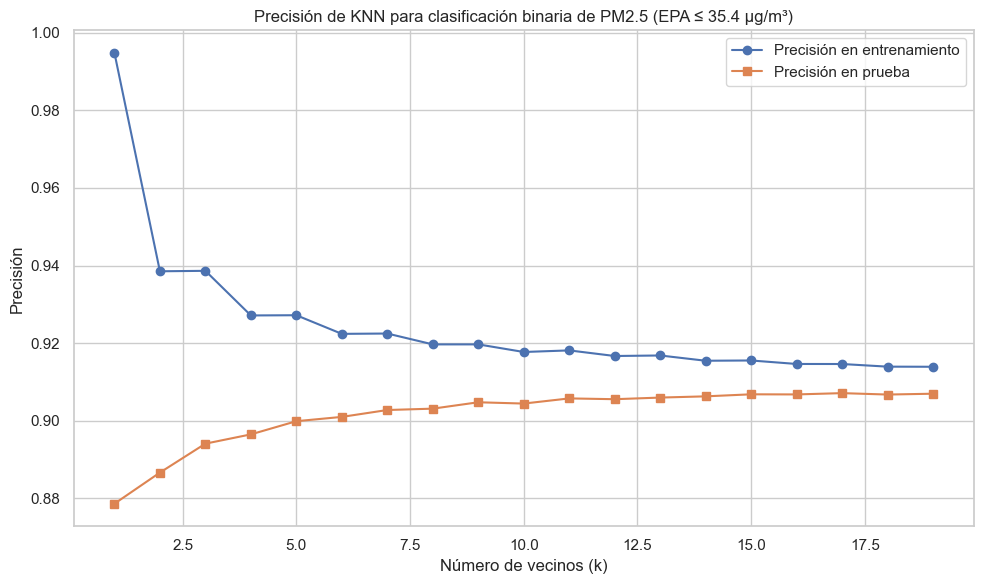


Mejor valor de k: 17 con precisión de prueba: 0.907


In [64]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy, label="Precisión en entrenamiento", marker='o')
plt.plot(neighbors_settings, test_accuracy, label="Precisión en prueba", marker='s')
plt.ylabel("Precisión")
plt.xlabel("Número de vecinos (k)")
plt.title("Precisión de KNN para clasificación binaria de PM2.5 (EPA ≤ 35.4 µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mejor_k = neighbors_settings[test_accuracy.index(max(test_accuracy))]
print(f"\nMejor valor de k: {mejor_k} con precisión de prueba: {max(test_accuracy):.3f}")

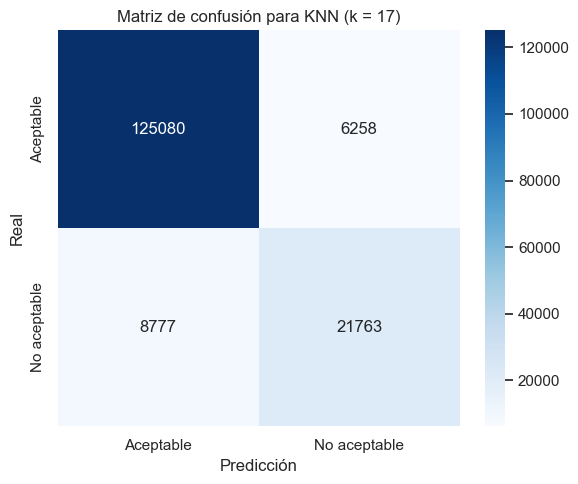

Reporte de clasificación:
              precision    recall  f1-score   support

   Aceptable       0.93      0.95      0.94    131338
No aceptable       0.78      0.71      0.74     30540

    accuracy                           0.91    161878
   macro avg       0.86      0.83      0.84    161878
weighted avg       0.90      0.91      0.91    161878



In [65]:
clf_final = KNeighborsClassifier(n_neighbors=mejor_k)
clf_final.fit(X_train, y_train)
y_pred = clf_final.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_bin.classes_, yticklabels=le_bin.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de confusión para KNN (k = {mejor_k})")
plt.tight_layout()
plt.show()

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le_bin.classes_))

En terminos de matriz de relacion, el modelo es muy eficaz a la hora de predecir aquellos valores de "Aceptable", pero pierde poder predictivo para aquellos con "No aceptable", tiene un puntaje de 0.94 y 0.74 respectivamente con las metricas de evaluacion.

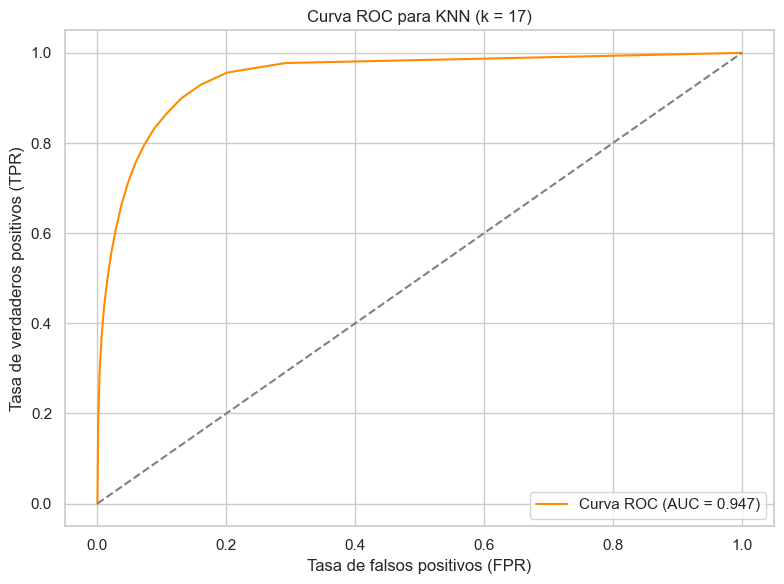

In [66]:
y_prob = clf_final.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.3f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title(f"Curva ROC para KNN (k = {mejor_k})")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Y, a pesar de tener poco poder predictivo, en promedio tiene un buen ROC, lo cual lo convierte en un modelo eficaz, pero con capacidad de mejorar en terminos de prediccion binaria.

### 5.1.2 Modelo KNN usando validacion cruzada Kfold (k=5)

Para el siguiente modelo, usaremos validacion cruzada y usamos 5 folds para evaluar el modelo.

In [ ]:
def clasificar_pm25_binario(valor):
    return "Aceptable" if valor <= 35.4 else "No aceptable"

df_final["PM2.5_binaria"] = df_final["PM2.5_ug/m3"].apply(clasificar_pm25_binario)

le_bin = LabelEncoder()
df_final["PM2.5_clase_bin"] = le_bin.fit_transform(df_final["PM2.5_binaria"])

X = df_final[["PM10_ug/m3", "CO_ppm", "NO2_ppm", "O3_ppm", "SO2_ppm"]]
y = df_final["PM2.5_clase_bin"]

kfold = KFold(n_splits=5, shuffle=True, random_state=66)

training_accuracy = []
test_accuracy = []

print("Evaluación de precisión por número de vecinos (k):")
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    train_scores = []
    test_scores = []

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)

        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    avg_train = sum(train_scores) / len(train_scores)
    avg_test = sum(test_scores) / len(test_scores)

    training_accuracy.append(avg_train)
    test_accuracy.append(avg_test)

    print(f"k = {n_neighbors:2d} | Precisión entrenamiento: {avg_train:.3f} | Precisión prueba: {avg_test:.3f}")


Evaluación de precisión por número de vecinos (k):
k =  1 | Precisión entrenamiento: 0.994 | Precisión prueba: 0.878
k =  2 | Precisión entrenamiento: 0.939 | Precisión prueba: 0.886
k =  3 | Precisión entrenamiento: 0.939 | Precisión prueba: 0.895
k =  4 | Precisión entrenamiento: 0.927 | Precisión prueba: 0.897
k =  5 | Precisión entrenamiento: 0.927 | Precisión prueba: 0.900
k =  6 | Precisión entrenamiento: 0.922 | Precisión prueba: 0.901
k =  7 | Precisión entrenamiento: 0.923 | Precisión prueba: 0.903
k =  8 | Precisión entrenamiento: 0.920 | Precisión prueba: 0.903
k =  9 | Precisión entrenamiento: 0.920 | Precisión prueba: 0.904
k = 10 | Precisión entrenamiento: 0.918 | Precisión prueba: 0.904
k = 11 | Precisión entrenamiento: 0.918 | Precisión prueba: 0.905
k = 12 | Precisión entrenamiento: 0.917 | Precisión prueba: 0.905
k = 13 | Precisión entrenamiento: 0.917 | Precisión prueba: 0.906
k = 14 | Precisión entrenamiento: 0.916 | Precisión prueba: 0.906
k = 15 | Precisión entren

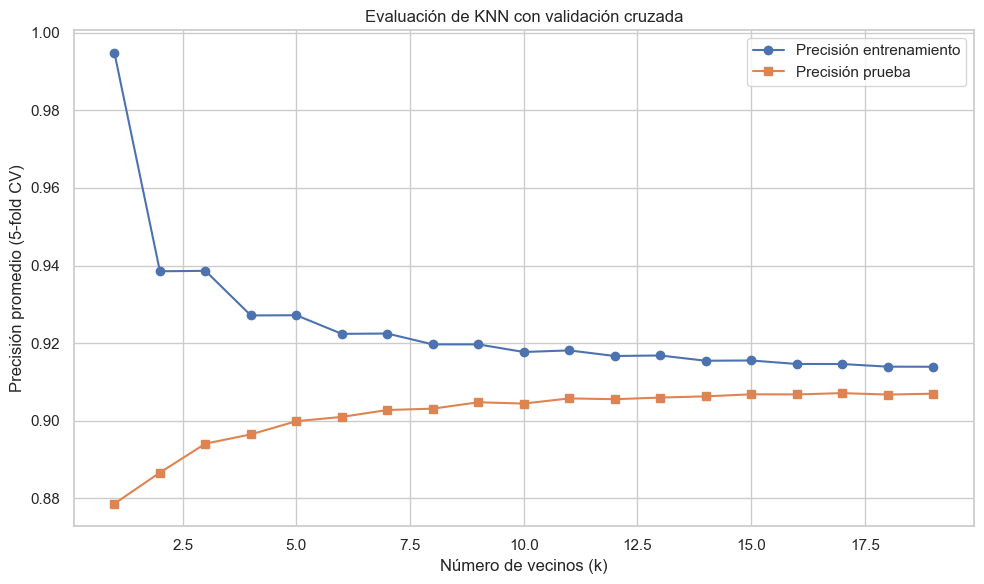

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy, label="Precisión entrenamiento", marker='o')
plt.plot(neighbors_settings, test_accuracy, label="Precisión prueba", marker='s')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión promedio (5-fold CV)")
plt.title("Evaluación de KNN con validación cruzada")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("precision_knn_kfold.png")
plt.show()

C:\Users\taran\AppData\Local\Temp\ipykernel_3252\1646634369.py:29: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


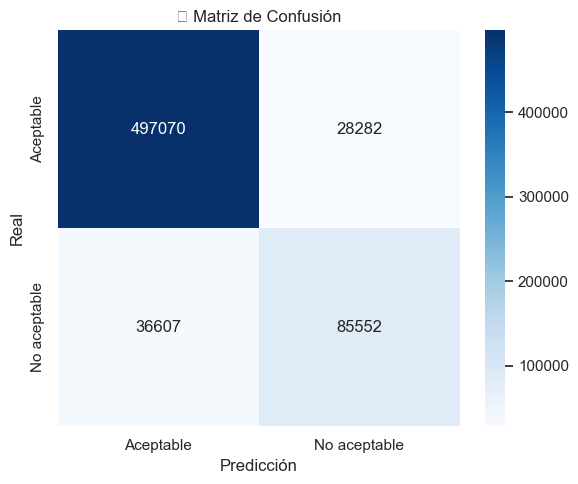

🔹 Reporte de clasificación:

              precision    recall  f1-score   support

   Aceptable       0.93      0.95      0.94    525352
No aceptable       0.75      0.70      0.73    122159

    accuracy                           0.90    647511
   macro avg       0.84      0.82      0.83    647511
weighted avg       0.90      0.90      0.90    647511



In [83]:
y_true_all = []
y_pred_all = []

for train_idx, test_idx in kfold.split(X):
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    
    y_pred = clf.predict(X.iloc[test_idx])
    y_true = y.iloc[test_idx]
    
    y_true_all.extend(y_true)
    y_pred_all.extend(y_pred)

cm = confusion_matrix(y_true_all, y_pred_all)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_bin.classes_,
            yticklabels=le_bin.classes_)
plt.title("🔹 Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

print("Reporte de clasificación:\n")
print(classification_report(y_true_all, y_pred_all, target_names=le_bin.classes_))

En base a los resultados, tiene un similar comportamiento al KNN estandar, con problemas en predecir aquellos datos "No aceptable", con un valor de score similar tanto en precision, recall y f1-score.

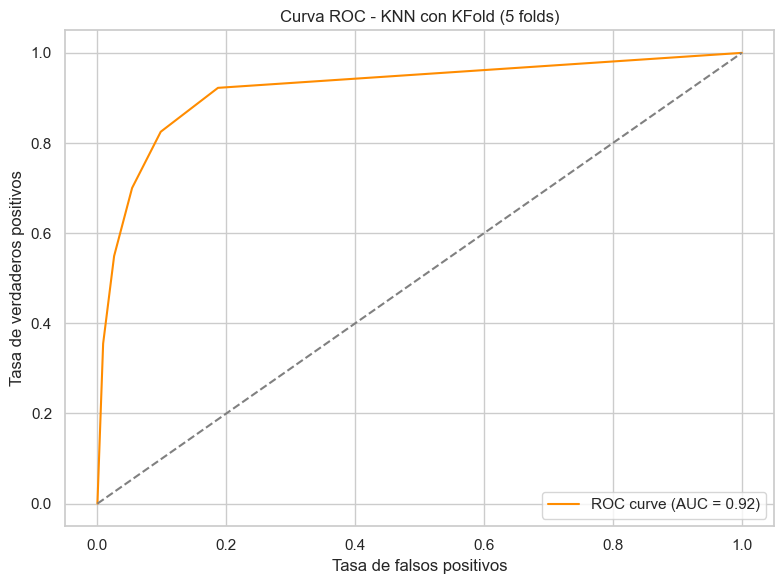

In [ ]:
y_prob_all = []
y_true_all = []

for train_idx, test_idx in kfold.split(X):
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_prob = clf.predict_proba(X.iloc[test_idx])[:, 1]
    y_prob_all.extend(y_prob)
    y_true_all.extend(y.iloc[test_idx]) 

fpr, tpr, _ = roc_curve(y_true_all, y_prob_all)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC - KNN con KFold (5 folds)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_curve_knn_kfold.png")
plt.show()

Sin embargo, otorga un resultado menor cuando evaluamos en la curva ROC, de 0.92.

### 5.1.3 Modelo usando regresion logistica (logRes)

A diferencia de los primeros dos, usaremos logRes, o regresion logistica para evaluar la capacidad del modelo.

In [84]:
def clasificar_pm25_binario(valor):
    return "Aceptable" if valor <= 35.4 else "No aceptable"

df_final["PM2.5_binaria"] = df_final["PM2.5_ug/m3"].apply(clasificar_pm25_binario)

le_bin = LabelEncoder()
df_final["PM2.5_clase_bin"] = le_bin.fit_transform(df_final["PM2.5_binaria"])

X = df_final[["PM10_ug/m3", "CO_ppm", "NO2_ppm", "O3_ppm", "SO2_ppm"]]
y = df_final["PM2.5_clase_bin"]
target_names = le_bin.classes_

In [87]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=66, stratify=y
)

# Entrenar modelo de regresión logística
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)


# Predicción de clases y probabilidades
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

C:\Users\taran\AppData\Local\Temp\ipykernel_3252\3678701292.py:10: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


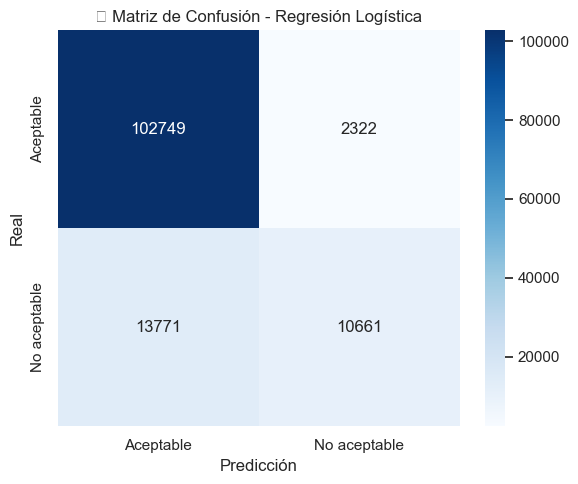

Reporte de clasificación:

              precision    recall  f1-score   support

   Aceptable       0.88      0.98      0.93    105071
No aceptable       0.82      0.44      0.57     24432

    accuracy                           0.88    129503
   macro avg       0.85      0.71      0.75    129503
weighted avg       0.87      0.88      0.86    129503



In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_bin.classes_,
            yticklabels=le_bin.classes_)
plt.title("🔹 Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=le_bin.classes_))

De forma similar, tienen comportamientos parecidos con el poder predictivo para "Aceptable", pero no es tan eficaz para "No aceptable", con scores bajos en general.

C:\Users\taran\AppData\Local\Temp\ipykernel_3252\4202296510.py:12: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


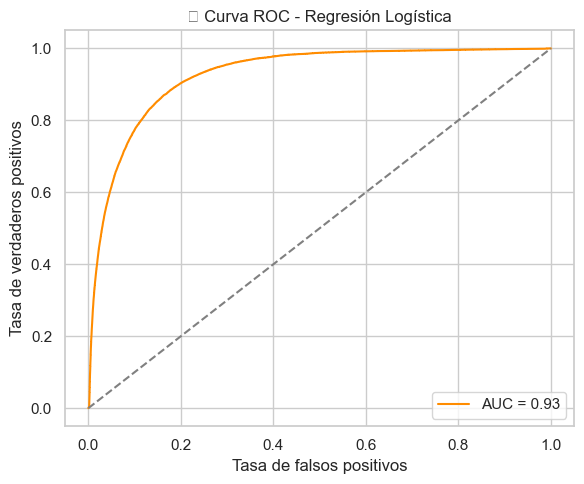

In [89]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("🔹 Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

A pesar de los resultados anteriores, mantiene una curva ROC estable y positiva, con un puntaje de 0.93.

## 5.2 Modelos para predecir el contaminante PM2.5 usando clasificacion multivariada.

### 5.2.1 Modelo KNN standard

Aqui, tomaremos los modelos planteados en la seccion anterior pero los plantearemos para clasificar de forma multivariada al contaminante PM2.5.

In [129]:
def clasificar_pm25_epa(valor):
    if valor <= 12.0:
        return "Buena"
    elif valor <= 35.4:
        return "Moderada"
    elif valor <= 55.4:
        return "Poco saludable grupos sensibles"
    elif valor <= 150.4:
        return "Poco saludable"
    elif valor <= 250.4:
        return "Muy poco saludable"
    else:
        return "Peligrosa"

df_final["PM2.5_categoria"] = df_final["PM2.5_ug/m3"].apply(clasificar_pm25_epa)

le_epa = LabelEncoder()
df_final["PM2.5_clase_epa"] = le_epa.fit_transform(df_final["PM2.5_categoria"])

X = df_final[["PM10_ug/m3", "CO_ppm", "NO2_ppm", "O3_ppm", "SO2_ppm"]]
y = df_final["PM2.5_clase_epa"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

training_accuracy = []
test_accuracy = []

print("Evaluación de precisión por número de vecinos (k):")
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    training_accuracy.append(train_score)
    test_accuracy.append(test_score)
    print(f"k = {n_neighbors:2d} | Precisión entrenamiento: {train_score:.3f} | Precisión prueba: {test_score:.3f}")

Evaluación de precisión por número de vecinos (k):
k =  1 | Precisión entrenamiento: 0.972 | Precisión prueba: 0.685
k =  2 | Precisión entrenamiento: 0.839 | Precisión prueba: 0.679
k =  3 | Precisión entrenamiento: 0.837 | Precisión prueba: 0.718
k =  4 | Precisión entrenamiento: 0.811 | Precisión prueba: 0.723
k =  5 | Precisión entrenamiento: 0.808 | Precisión prueba: 0.735
k =  6 | Precisión entrenamiento: 0.798 | Precisión prueba: 0.737
k =  7 | Precisión entrenamiento: 0.796 | Precisión prueba: 0.744
k =  8 | Precisión entrenamiento: 0.791 | Precisión prueba: 0.744
k =  9 | Precisión entrenamiento: 0.789 | Precisión prueba: 0.748
k = 10 | Precisión entrenamiento: 0.786 | Precisión prueba: 0.749
k = 11 | Precisión entrenamiento: 0.785 | Precisión prueba: 0.752
k = 12 | Precisión entrenamiento: 0.783 | Precisión prueba: 0.752
k = 13 | Precisión entrenamiento: 0.782 | Precisión prueba: 0.754
k = 14 | Precisión entrenamiento: 0.780 | Precisión prueba: 0.754
k = 15 | Precisión entren

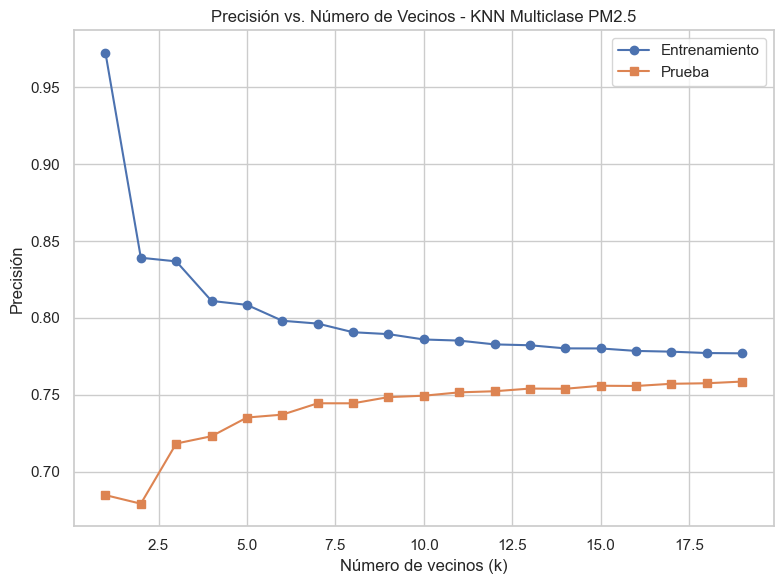

In [130]:
plt.figure(figsize=(8, 6))
plt.plot(neighbors_settings, training_accuracy, label="Entrenamiento", marker='o')
plt.plot(neighbors_settings, test_accuracy, label="Prueba", marker='s')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión")
plt.title("Precisión vs. Número de Vecinos - KNN Multiclase PM2.5")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [131]:
mejor_k = neighbors_settings[np.argmax(test_accuracy)]
clf_final = KNeighborsClassifier(n_neighbors=mejor_k)
clf_final.fit(X_train, y_train)
y_pred = clf_final.predict(X_test)

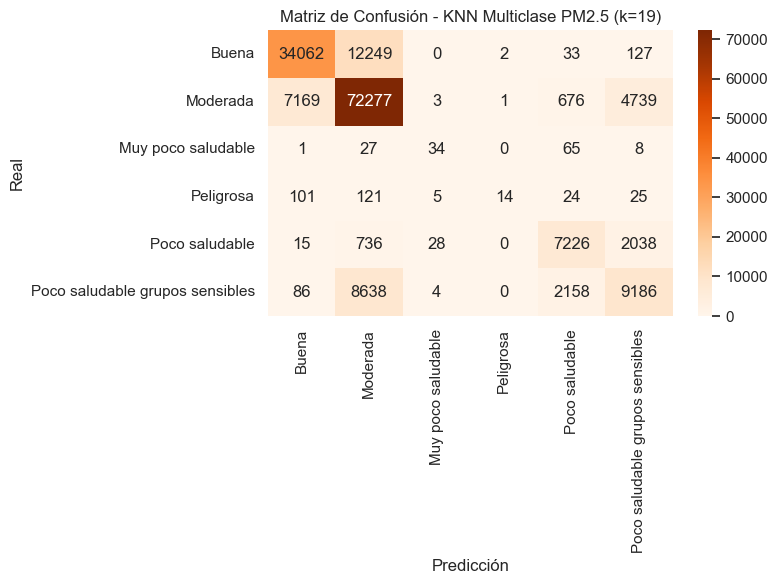

Reporte de clasificación - KNN Multiclase PM2.5 (k=19):

                                 precision    recall  f1-score   support

                          Buena       0.82      0.73      0.77     46473
                       Moderada       0.77      0.85      0.81     84865
             Muy poco saludable       0.46      0.25      0.33       135
                      Peligrosa       0.82      0.05      0.09       290
                 Poco saludable       0.71      0.72      0.71     10043
Poco saludable grupos sensibles       0.57      0.46      0.51     20072

                       accuracy                           0.76    161878
                      macro avg       0.69      0.51      0.54    161878
                   weighted avg       0.76      0.76      0.75    161878



In [132]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=etiquetas,
            yticklabels=etiquetas)
plt.title(f"Matriz de Confusión - KNN Multiclase PM2.5 (k={mejor_k})")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

print(f"Reporte de clasificación - KNN Multiclase PM2.5 (k={mejor_k}):\n")
print(classification_report(y_test, y_pred, target_names=etiquetas))

En terminos a resultados numericos, el modelo puede detectar las categorias pero no a buen nivel, a pesar de todo, tiene mucho margen para mejorar su predictabilidad.

C:\Users\taran\AppData\Local\Temp\ipykernel_3252\3723797331.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", n_classes)


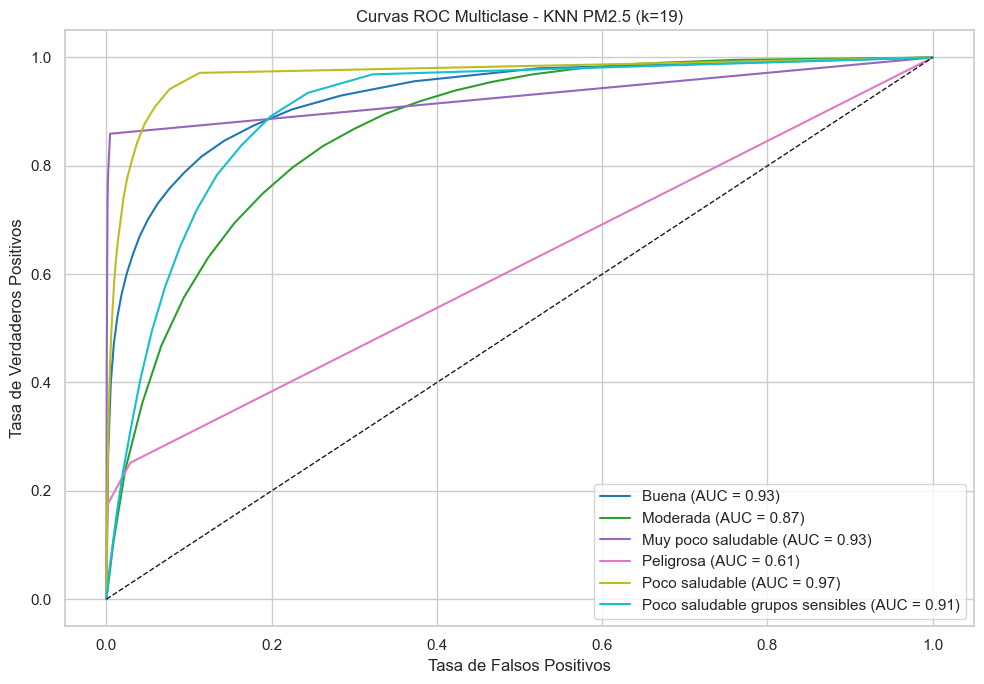

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.arange(len(etiquetas)))
y_score = clf_final.predict_proba(X_test)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
colors = plt.cm.get_cmap("tab10", n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{etiquetas[i]} (AUC = {roc_auc[i]:.2f})", color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title(f"Curvas ROC Multiclase - KNN PM2.5 (k={mejor_k})")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Para el area bajo la curva ROC, se tiene una mejora considerable con relacion con las diferentes clasificaciones, con la categoria "Peligrosa" tenieneo el peor rendimiento.

### 5.2.2 Modelo usando regresion logistica (logRes)

Aqui, como en la seccion anterior, usaremos regresion logistica para clasificacion multivariada.

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


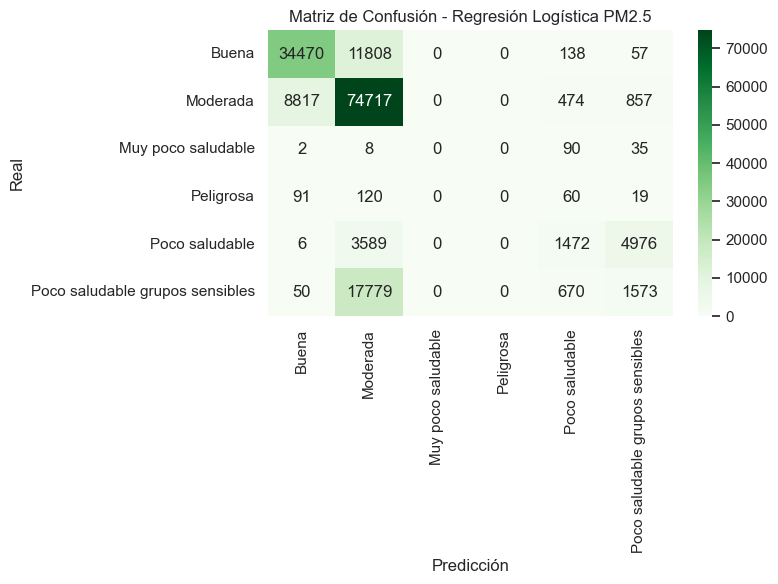

Reporte de clasificación - Regresión Logística PM2.5:

                                 precision    recall  f1-score   support

                          Buena       0.79      0.74      0.77     46473
                       Moderada       0.69      0.88      0.77     84865
             Muy poco saludable       0.00      0.00      0.00       135
                      Peligrosa       0.00      0.00      0.00       290
                 Poco saludable       0.51      0.15      0.23     10043
Poco saludable grupos sensibles       0.21      0.08      0.11     20072

                       accuracy                           0.69    161878
                      macro avg       0.37      0.31      0.31    161878
                   weighted avg       0.65      0.69      0.65    161878



c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [ ]:
def clasificar_pm25_epa(valor):
    if valor <= 12.0:
        return "Buena"
    elif valor <= 35.4:
        return "Moderada"
    elif valor <= 55.4:
        return "Poco saludable grupos sensibles"
    elif valor <= 150.4:
        return "Poco saludable"
    elif valor <= 250.4:
        return "Muy poco saludable"
    else:
        return "Peligrosa"

df_final["PM2.5_categoria"] = df_final["PM2.5_ug/m3"].apply(clasificar_pm25_epa)

le_epa = LabelEncoder()
df_final["PM2.5_clase_epa"] = le_epa.fit_transform(df_final["PM2.5_categoria"])

X = df_final[["PM10_ug/m3", "CO_ppm", "NO2_ppm", "O3_ppm", "SO2_ppm"]]
y = df_final["PM2.5_clase_epa"]
target_names = le_epa.classes_

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title("Matriz de Confusión - Regresión Logística PM2.5")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

print("Reporte de clasificación - Regresión Logística PM2.5:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

Aqui, el modelo tiene problemas al intentar clasificar datos como "Muy poco saludable" y "Peligrosa, en parte por la poca cantidad de datos, y para los que si detecta, tiene una poca capacidad predictiva, respaldad por el respectivo score.

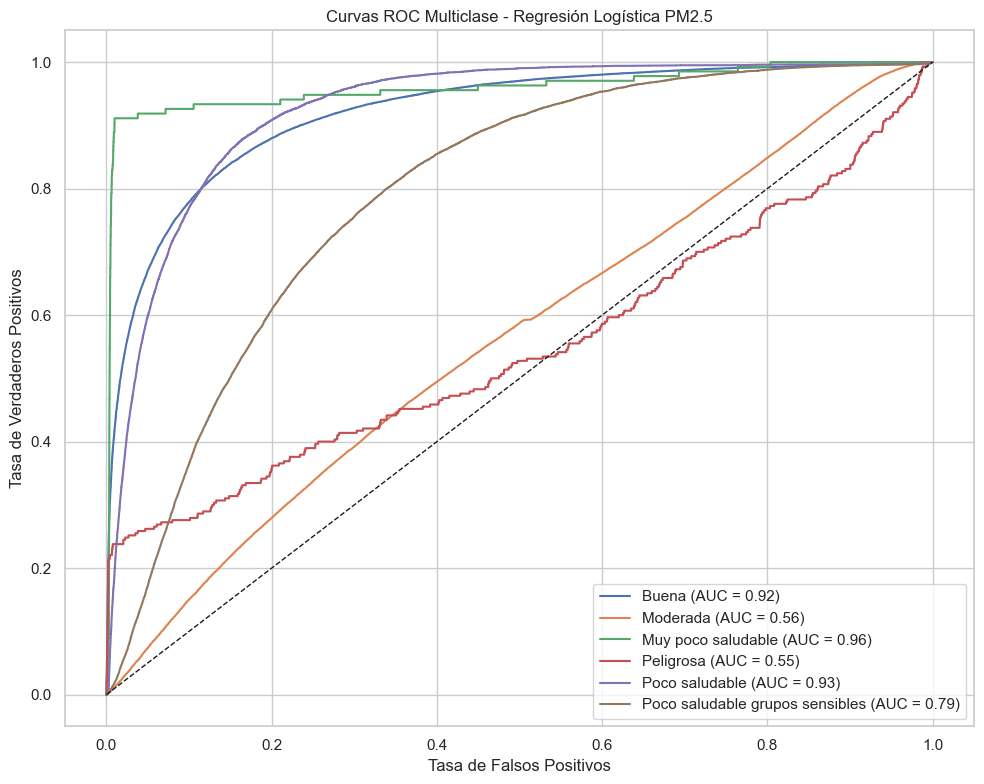

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.arange(len(target_names)))
y_train_bin = label_binarize(y_train, classes=np.arange(len(target_names)))
n_classes = y_test_bin.shape[1]

ovr_clf = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=1000))
)
ovr_clf.fit(X_train, y_train_bin)
y_score = ovr_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{target_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC Multiclase - Regresión Logística PM2.5")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Para las curva ROC, se observa lo estudiado en los resultados con respecto a los score, con "Peligrosa" y "Moderada" teniendo problemas y estando bajo el estandar planteado.

## 5.3 Modelos para predecir el contaminante PM10 usando clasificacion Binaria.

### 5.3.1 Modelo KNN standard

A diferencia de la seccion anterior, esta vez estaremos prediciendo de forma binaria el indicador PM10, de forma analoga sobre las categorias "Aceptable" y "No aceptable".

In [ ]:
def clasificar_pm10_binario(valor):
    return "Aceptable" if valor <= 154 else "No aceptable"

df_final["PM10_binaria"] = df_final["PM10_ug/m3"].apply(clasificar_pm10_binario)

le_bin_pm10 = LabelEncoder()
df_final["PM10_clase_bin"] = le_bin_pm10.fit_transform(df_final["PM10_binaria"])

X = df_final[["PM2.5_ug/m3", "CO_ppm", "NO2_ppm", "O3_ppm", "SO2_ppm"]]
y = df_final["PM10_clase_bin"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

training_accuracy = []
test_accuracy = []

print("Evaluación de precisión por número de vecinos (k):")
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    training_accuracy.append(train_score)
    test_accuracy.append(test_score)
    print(f"k = {n_neighbors:2d} | Precisión entrenamiento: {train_score:.3f} | Precisión prueba: {test_score:.3f}")

Evaluación de precisión por número de vecinos (k):
k =  1 | Precisión entrenamiento: 0.999 | Precisión prueba: 0.986
k =  2 | Precisión entrenamiento: 0.993 | Precisión prueba: 0.991
k =  3 | Precisión entrenamiento: 0.993 | Precisión prueba: 0.991
k =  4 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k =  5 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k =  6 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k =  7 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k =  8 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k =  9 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k = 10 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k = 11 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k = 12 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k = 13 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k = 14 | Precisión entrenamiento: 0.992 | Precisión prueba: 0.992
k = 15 | Precisión entren

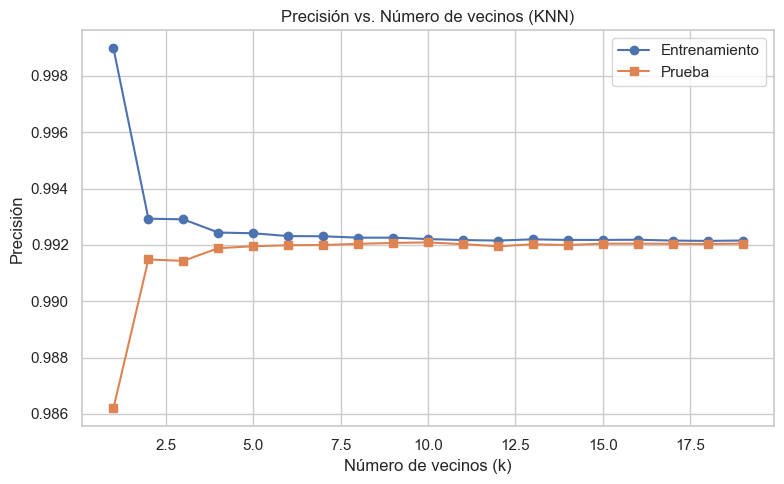

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(neighbors_settings, training_accuracy, label="Entrenamiento", marker='o')
plt.plot(neighbors_settings, test_accuracy, label="Prueba", marker='s')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión")
plt.title("Precisión vs. Número de vecinos (KNN)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

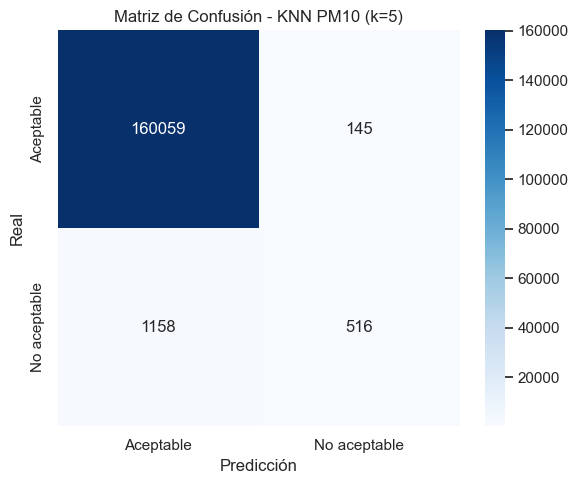

Reporte de clasificación - KNN PM10 (k=5):

              precision    recall  f1-score   support

   Aceptable       0.99      1.00      1.00    160204
No aceptable       0.78      0.31      0.44      1674

    accuracy                           0.99    161878
   macro avg       0.89      0.65      0.72    161878
weighted avg       0.99      0.99      0.99    161878



In [ ]:
best_k = 5
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
target_names = le_bin_pm10.classes_

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title(f"Matriz de Confusión - KNN PM10 (k={best_k})")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

print(f"Reporte de clasificación - KNN PM10 (k={best_k}):\n")
print(classification_report(y_test, y_pred, target_names=target_names))

El modelo tiene un rendimiento excelente a la hora de predecir datos "Aceptables", pero pierde mucha capacidad predictiva sobre los datos "No aceptables".

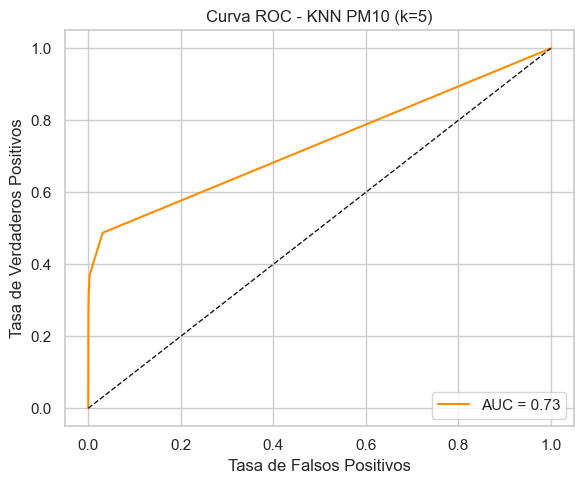

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train_scaled, y_train)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title(f"Curva ROC - KNN PM10 (k={best_k})")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Debido a las diferencias entre los puntajes para las dos categorias, el area bajo la curva ROC llega a ser 0.73.

In [ ]:
mejor_k = neighbors_settings[test_accuracy.index(max(test_accuracy))]

print(f"\nMejor k según precisión en prueba: {mejor_k}")
print(f"Precisión entrenamiento: {training_accuracy[mejor_k - 1]:.3f}")
print(f"Precisión prueba: {test_accuracy[mejor_k - 1]:.3f}")


Mejor k según precisión en prueba: 10
Precisión entrenamiento: 0.992
Precisión prueba: 0.992


### 5.3.3 Modelo usando regresion logistica (logRes)

Para PM10, tambien usaremos regresion logistica para analizar su capacidad predictiva. Para variar, se clasificaran los valores en 0s y 1s, en vez de considerarse con "Aceptable" o "No aceptable".

In [ ]:
def clasificar_pm10_bin(valor):
    if valor <= 154:  
        return 0
    else:  
        return 1

df_final["PM10_binaria"] = df_final["PM10_ug/m3"].apply(clasificar_pm10_bin)

X = df_final[["PM2.5_ug/m3", "CO_ppm", "NO2_ppm", "O3_ppm", "SO2_ppm"]]
y = df_final["PM10_binaria"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

logreg_bin = LogisticRegression(solver='liblinear')
logreg_bin.fit(X_train, y_train)

y_pred = logreg_bin.predict(X_test)
y_proba = logreg_bin.predict_proba(X_test)[:, 1]

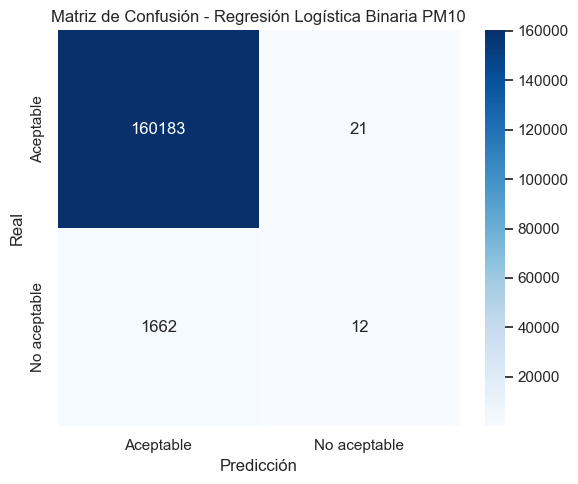

Reporte de clasificación - Regresión Logística Binaria PM10:

              precision    recall  f1-score   support

   Aceptable       0.99      1.00      0.99    160204
No aceptable       0.36      0.01      0.01      1674

    accuracy                           0.99    161878
   macro avg       0.68      0.50      0.50    161878
weighted avg       0.98      0.99      0.98    161878



In [127]:
cm_bin = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Aceptable", "No aceptable"],
            yticklabels=["Aceptable", "No aceptable"])
plt.title("Matriz de Confusión - Regresión Logística Binaria PM10")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

print("Reporte de clasificación - Regresión Logística Binaria PM10:\n")
print(classification_report(y_test, y_pred, target_names=["Aceptable", "No aceptable"]))

Para este modelo, tambien tiene muchos problemas prediciendo la categoria "No aceptable", donde padece de predictabilidad, mientras que con la categoria "Aceptable" parece no tener problemas.

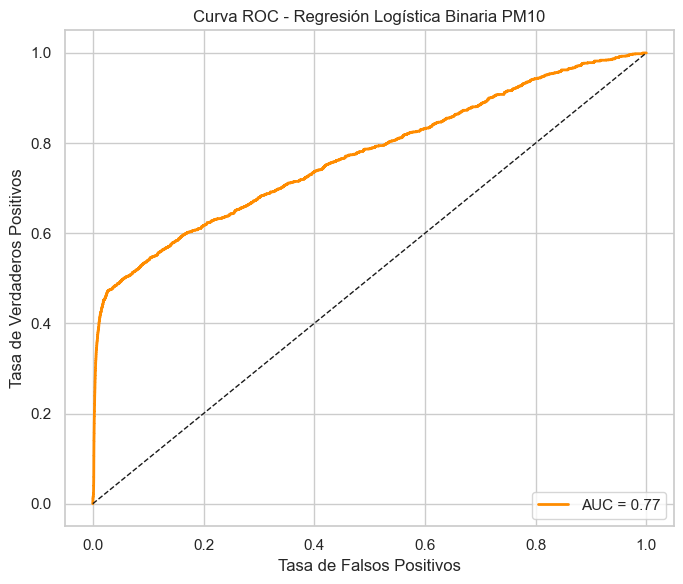

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Regresión Logística Binaria PM10")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Respaldado por los resultados numericos, el area bajo la curva ROC se ve afectada y tiene un resultado de 0.77.

## 5.4 Modelos para predecir el contaminante PM10 usando clasificacion Multivariada.

### 5.4.1 Modelo KNN standard

En este caso, usaremos un modelo KNN para predecir PM10 teniendo en cuenta las diferentes clasificaciones de salud segun la calidad de aire.

In [ ]:
def clasificar_pm10_epa(valor):
    if valor <= 54:
        return "Buena"
    elif valor <= 154:
        return "Moderada"
    elif valor <= 254:
        return "Poco saludable grupos sensibles"
    elif valor <= 354:
        return "Poco saludable"
    elif valor <= 424:
        return "Muy poco saludable"
    else:
        return "Peligrosa"

df_final["PM10_categoria"] = df_final["PM10_ug/m3"].apply(clasificar_pm10_epa)

le_epa_pm10 = LabelEncoder()
df_final["PM10_clase_epa"] = le_epa_pm10.fit_transform(df_final["PM10_categoria"])

X = df_final[["PM2.5_ug/m3", "CO_ppm", "NO2_ppm", "O3_ppm", "SO2_ppm"]]
y = df_final["PM10_clase_epa"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)

print("Evaluación de precisión por número de vecinos (k):")
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    training_accuracy.append(train_score)
    test_accuracy.append(test_score)
    print(f"k = {n_neighbors:2d} | Precisión entrenamiento: {train_score:.3f} | Precisión prueba: {test_score:.3f}")

Evaluación de precisión por número de vecinos (k):
k =  1 | Precisión entrenamiento: 0.984 | Precisión prueba: 0.840
k =  2 | Precisión entrenamiento: 0.918 | Precisión prueba: 0.872
k =  3 | Precisión entrenamiento: 0.918 | Precisión prueba: 0.873
k =  4 | Precisión entrenamiento: 0.906 | Precisión prueba: 0.882
k =  5 | Precisión entrenamiento: 0.906 | Precisión prueba: 0.882
k =  6 | Precisión entrenamiento: 0.901 | Precisión prueba: 0.886
k =  7 | Precisión entrenamiento: 0.902 | Precisión prueba: 0.886
k =  8 | Precisión entrenamiento: 0.899 | Precisión prueba: 0.888
k =  9 | Precisión entrenamiento: 0.899 | Precisión prueba: 0.888
k = 10 | Precisión entrenamiento: 0.898 | Precisión prueba: 0.889
k = 11 | Precisión entrenamiento: 0.897 | Precisión prueba: 0.889
k = 12 | Precisión entrenamiento: 0.897 | Precisión prueba: 0.890
k = 13 | Precisión entrenamiento: 0.897 | Precisión prueba: 0.890
k = 14 | Precisión entrenamiento: 0.896 | Precisión prueba: 0.890
k = 15 | Precisión entren

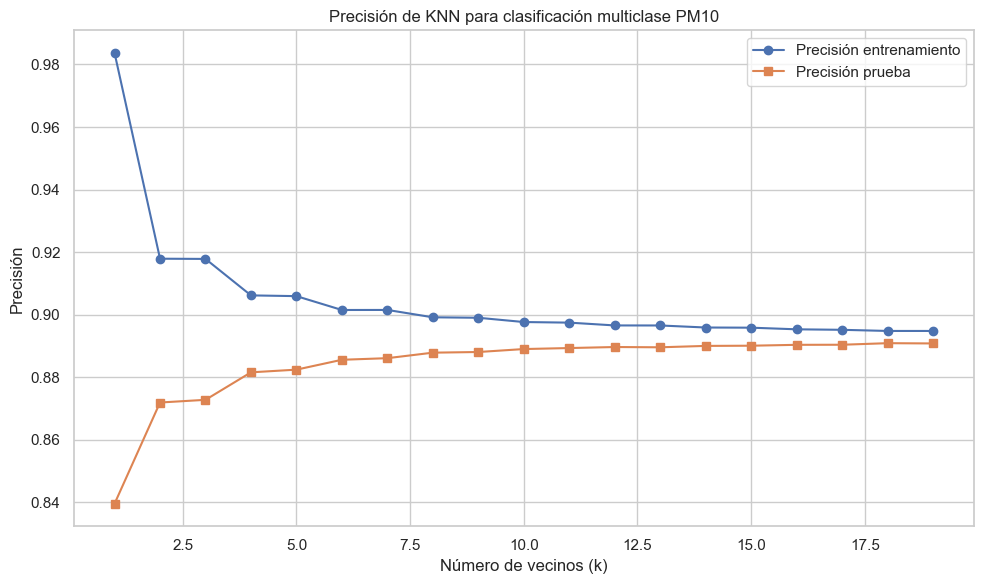

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(neighbors_settings, training_accuracy, label="Precisión entrenamiento", marker='o')
plt.plot(neighbors_settings, test_accuracy, label="Precisión prueba", marker='s')
plt.ylabel("Precisión")
plt.xlabel("Número de vecinos (k)")
plt.title("Precisión de KNN para clasificación multiclase PM10")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Mejor k según precisión en prueba: 18


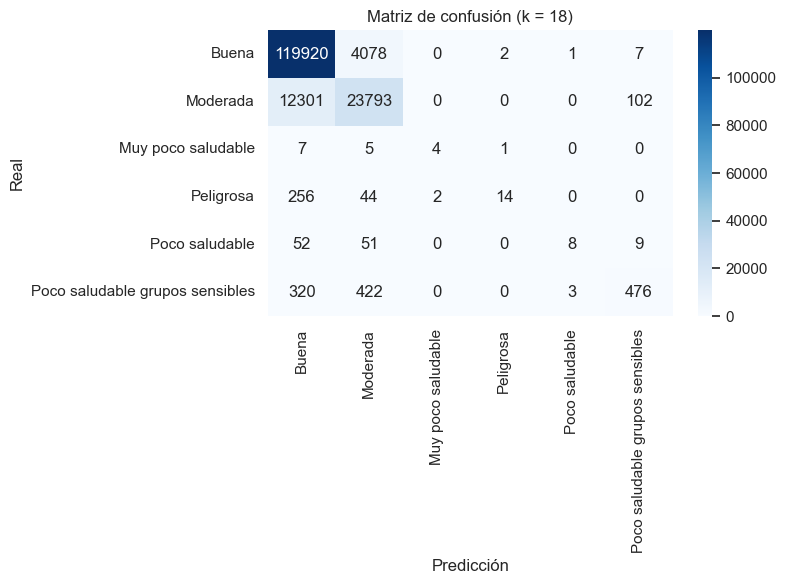


Reporte de clasificación:
                                 precision    recall  f1-score   support

                          Buena       0.90      0.97      0.93    124008
                       Moderada       0.84      0.66      0.74     36196
             Muy poco saludable       0.67      0.24      0.35        17
                      Peligrosa       0.82      0.04      0.08       316
                 Poco saludable       0.67      0.07      0.12       120
Poco saludable grupos sensibles       0.80      0.39      0.52      1221

                       accuracy                           0.89    161878
                      macro avg       0.78      0.39      0.46    161878
                   weighted avg       0.89      0.89      0.88    161878



In [118]:
mejor_k = neighbors_settings[np.argmax(test_accuracy)]
print(f"\nMejor k según precisión en prueba: {mejor_k}")

modelo_final = KNeighborsClassifier(n_neighbors=mejor_k)
modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
etiquetas = le_epa_pm10.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de confusión (k = {mejor_k})")
plt.tight_layout()
plt.show()

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=etiquetas))

A diferencia de los modelos anteriores, el modelo tiene por lo general un desempeño algo positivo, ya que pudo detectar a las diferentes clasificaciones, pero sigue teniendo problemas para detectar aquellas clases con menos datos.

C:\Users\taran\AppData\Local\Temp\ipykernel_3252\3798473155.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", n_classes)


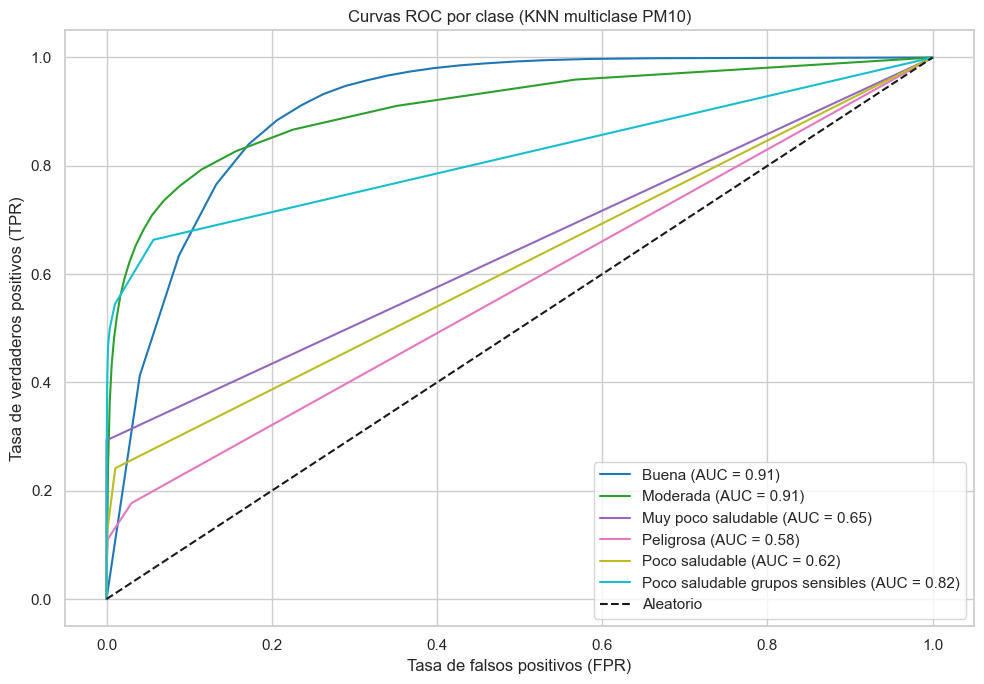

In [119]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

modelo_ovr = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=mejor_k))
modelo_ovr.fit(X_train, label_binarize(y_train, classes=np.unique(y)))
y_score = modelo_ovr.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
colors = plt.cm.get_cmap("tab10", n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{etiquetas[i]} (AUC = {roc_auc[i]:.2f})", color=colors(i))

plt.plot([0, 1], [0, 1], "k--", label="Aleatorio")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curvas ROC por clase (KNN multiclase PM10)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Las categorias clasificadas tienen un rendimiento algo por encima del minimo, pero tienen mucho margen de mejora para la predictabilidad.

### 5.4.2 Modelo usando regresion logistica (logRes)

In [ ]:
def clasificar_pm10_epa(valor):
    if valor <= 54:
        return "Buena"
    elif valor <= 154:
        return "Moderada"
    elif valor <= 254:
        return "Poco saludable grupos sensibles"
    elif valor <= 354:
        return "Poco saludable"
    elif valor <= 424:
        return "Muy poco saludable"
    else:
        return "Peligrosa"

df_final["PM10_categoria"] = df_final["PM10_ug/m3"].apply(clasificar_pm10_epa)

le_epa_pm10 = LabelEncoder()
df_final["PM10_clase_epa"] = le_epa_pm10.fit_transform(df_final["PM10_categoria"])

X = df_final[["PM2.5_ug/m3", "CO_ppm", "NO2_ppm", "O3_ppm", "SO2_ppm"]]
y = df_final["PM10_clase_epa"]
etiquetas = le_epa_pm10.classes_

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=66)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


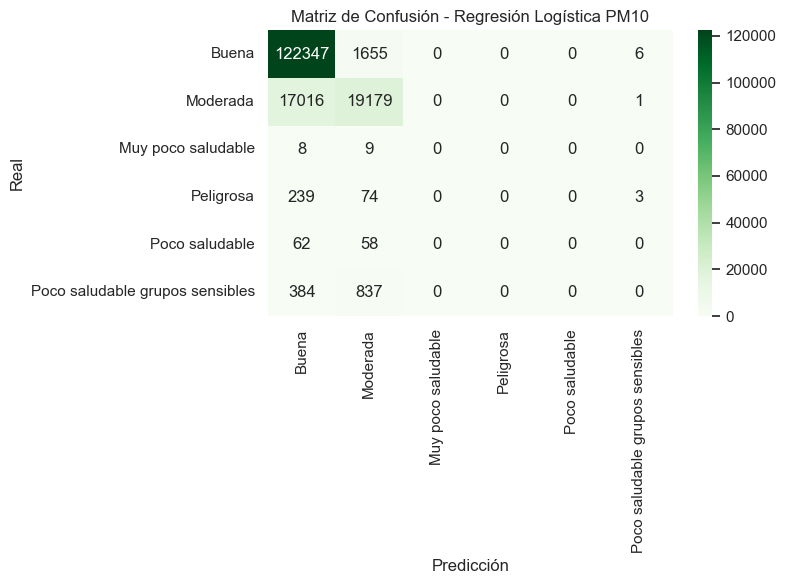

Reporte de clasificación - Regresión Logística PM10:

                                 precision    recall  f1-score   support

                          Buena       0.87      0.99      0.93    124008
                       Moderada       0.88      0.53      0.66     36196
             Muy poco saludable       0.00      0.00      0.00        17
                      Peligrosa       0.00      0.00      0.00       316
                 Poco saludable       0.00      0.00      0.00       120
Poco saludable grupos sensibles       0.00      0.00      0.00      1221

                       accuracy                           0.87    161878
                      macro avg       0.29      0.25      0.26    161878
                   weighted avg       0.87      0.87      0.86    161878



c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\taran\miniconda3\envs\base_finalML_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=etiquetas,
            yticklabels=etiquetas)
plt.title("Matriz de Confusión - Regresión Logística PM10")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

print("Reporte de clasificación - Regresión Logística PM10:\n")
print(classification_report(y_test, y_pred, target_names=etiquetas))

En base a los resutlados numericos, el modelo solo esta detectando los datos "Buena" y "Moderada", pero termina ignorando el resto de los datos en el modelo, lo cual lo hace tener una predictabilidad muy pobre y necesidad de replantear y mejorar el modelo.

C:\Users\taran\AppData\Local\Temp\ipykernel_3252\1503780462.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", n_classes)


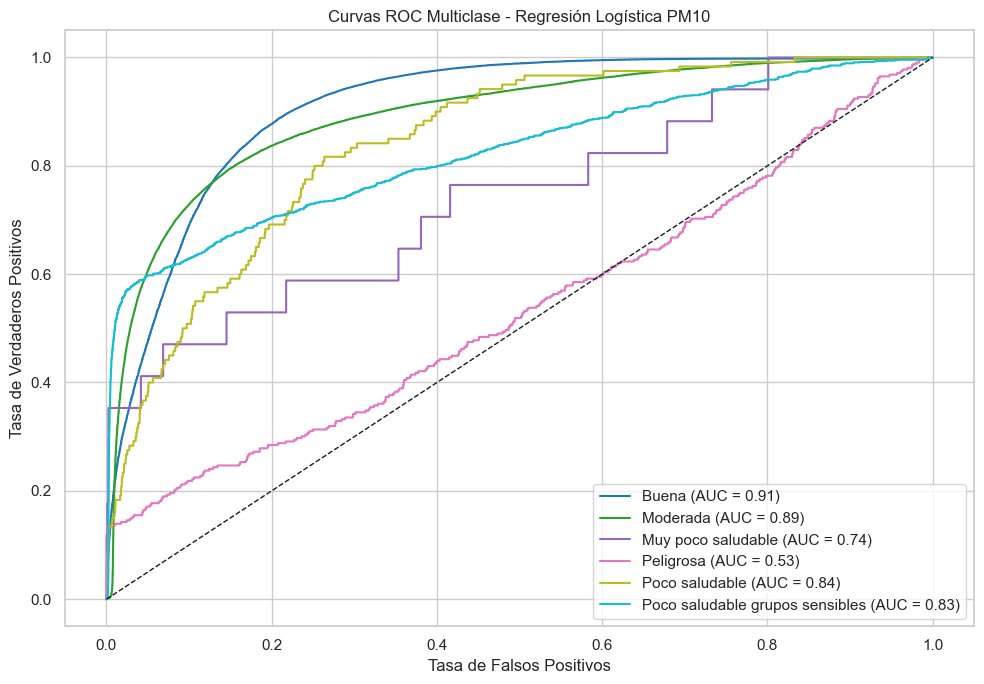

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.arange(len(etiquetas)))
y_train_bin = label_binarize(y_train, classes=np.arange(len(etiquetas)))
n_classes = y_test_bin.shape[1]

ovr_clf = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=1000))
)
ovr_clf.fit(X_train, y_train_bin)
y_score = ovr_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
colors = plt.cm.get_cmap("tab10", n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{etiquetas[i]} (AUC = {roc_auc[i]:.2f})", color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curvas ROC Multiclase - Regresión Logística PM10")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Aqui, se evidencia el poco poder predictivo que tiene el modelo para las categorias que no son "Buena" o "Moderada". El modelo tiene margen de mejora para poder tener mejor predictabilidad.